# LANL Earthquake Prediction

# 1. Business Problem

## 1.1. Description

Source: https://www.kaggle.com/c/LANL-Earthquake-Prediction

Correctly predicting earthquakes is very important for preventing deaths and damage to infrastructure.
Forecasting earthquakes is one of the most important problems in Earth science because of their devastating consequences. Current scientific studies related to earthquake forecasting focus on three key points: when the event will occur, where it will occur, and how large it will be.

#### **Problem statement :** Here we have to predict is the remaining time before the next laboratory earthquakes based on the seismic data.

Remaining time meant by the remaining time between current earthquake and occurrence of next earthquake.

## 1.2. Source/Useful Links

Some articles and reference blogs about the problem statement

Blog 1. https://medium.com/@saivenkat_/a-detailed-case-study-on-lanlearthquake-prediction-using-machine-learning-algorithms-beginnerto-9b38ef270887

Blog 2. https://www.pnas.org/doi/10.1073/pnas.2011362118

Blog 3. Time series https://analyticsindiamag.com/a-guide-to-feature-engineering-in-time-series-with-tsfresh/

Kaggle Winning Solution and other approaches: 4. https://medium.com/@ph_singer/1st-place-in-kaggle-lanl-earthquakeprediction-competition-15a1137c2457


## 1.3 Data Information

Ge the data from https://www.kaggle.com/c/LANL-Earthquake-Prediction 
All the data is generated in one laboratory because using real data and predicting the earthquake is very hard.The only feature we have is the seismic signal (acoustic data), which is recorded using a piezoceramic sensor and corresponds to the voltage upon deformation (in integers)

The dataset contains:-

    A. Train.csv, in this file, contains 2 columns, the 1st one is acoustic_data which is a wave (The scientific study of sound, especially of its generation, transmission, and reception) this wave looks like sound waves &  continuous segment of experimental data. And 2nd one is time_to_failure, basically, it is a remaining time to the next earthquake

    B. Test.csv, in this folder there are a many of .csv files available and each file contains a series of acoustic waves, and in each test file in the test set contains only 150,000 samples.
 
Both train and test come from the same exp.

# 2 ML Problem Formulation
Time-series forecasting and Regression.

Predict the remaining time before the next laboratory earthquakes based on the seismic data.

### 2.1 Brief intro about the Time Series.

As we know that our problem is based on the time series let's learn what is time series,
Basically, we have two types of time series problems present.
#### 1. Univariate Time Series
It means when you want to do something forecasting based on a single variable it's called univariate time series. Eg earthquake prediction.
And handle the univariate time series we have some good models like ARIMA, Facebook Prophet, etc. we learn all models later in this notebook.
#### 2.  Multivariate Time Series
It means when you have more than two features and predict the variables based on other features it is called a multivariable time series, Eg when you have features like Date, Humidity, rainfall and you want to predict the Temputer based on other features, it's become multivariate time series problem.

<img src="https://i.imgur.com/uHZMGkC_d.webp?maxwidth=760&fidelity=grand" alt="alternatetext">

# 3 Performance Metrics

As we know the given problem is a regression-based problem so we can use the performance metrics as Mean Absolute Error(MAE), Mean Squared Error(MSE), RMSE, etc.

But here we use Mean Absolute Error(MAE), MAE is a very simple metric that calculates the absolute difference between actual and predicted values, and We took this problem from the kaggle so kaggle is provided this evaluation metrics.

Our data is Stationary in nature so MAE is very useful to use Mean Absolute Error as an evaluation Metric.

The metric for evaluation is provided as a mean absolute error (MAE). So we will be working with MAE as a metric. 

And as the second matric, we can use a MAPE which is a give very good sense of predicting values.

more about it https://analyticsindiamag.com/a-guide-to-different-evaluation-metrics-for-time-series-forecasting-models/

In [1]:
#improt the some library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import dask.dataframe as dd
#import hvplot.dask
from statsmodels import robust
from scipy.stats import skew
from scipy.stats import kurtosis
from tqdm import tqdm

# 4 Exploratory Data Analysis(EDA)

### 4.1  Acoustic Data

In [2]:
#let's first check the size of the data set here
import os
import math
size = os.path.getsize("train.csv") / math.pow(1024,3) # here we get size in KB and we convert it into a GB
print("Size of data is in GB : {} ".format(size))

Size of data is in GB : 8.89930710569024 


In [3]:
# read a data using a dask library
df = dd.read_csv('train.csv')

In [3]:
#here help of pandas we display 13 digit of the our target variable by doing this we get better idea.
pd.options.display.precision = 13
df.head()

acoustic_data  time_to_failure
0             12     1.4690999832
1              6     1.4690999821
2              8     1.4690999810
3              5     1.4690999799
4              8     1.4690999788

In [5]:
#print the data information 
df.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 2 entries, acoustic_data to time_to_failure
dtypes: float64(1), int64(1)

In [6]:
#total number of row in our data set
len(df.index) 

629145480

Here we have a very huge amount of data set present

In [5]:
#minmum value of the acoustic data 
min(df.acoustic_data)

-5515

In [6]:
#print the maximum value of the acoustic_data
max(df.acoustic_data)

5444

In [6]:
#mean value of the acoustic_data
df.acoustic_data.mean().compute()

4.519467573700124

In [5]:
#Checking the if any values is null or not
df.isnull().sum().compute()

acoustic_data      0
time_to_failure    0
dtype: int64

Here given data is a very huge .csv file, we have roughly  9 GB of the earthquake data, this data is a high amount of data.

The minimum and maximum value of the acoustic wave is (-5515, 5444)

There is not a null value present in both column

mean value of the acoustic wave is 4.519.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


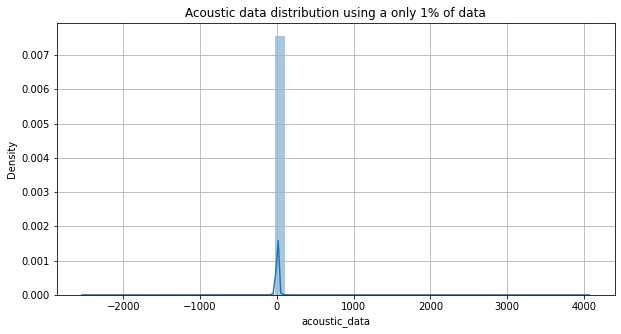

In [11]:
#print the pdf of the acoustic_data 
#Here we first take a sub_sumple of the acoustic_data and we use this data for print a pdf
#we take a 1% of dara in whole dataset
sample = df.sample(frac=0.01)
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution using a only 1% of data")
plt.grid()
ax = sns.distplot(sample.acoustic_data)

Here we plot a distribution of the acoustic data by using only 1% of the data,

By looking at the pdf of acoustic wave we can say there are many points lie between the range of -10 to 20 and here many points are values is very high like -2000 to 4000

By looking we get some idea about acoustic wave values but here we can not say clearly about data distribution, so let's zoom the plot of the distribution of acoustic waves.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


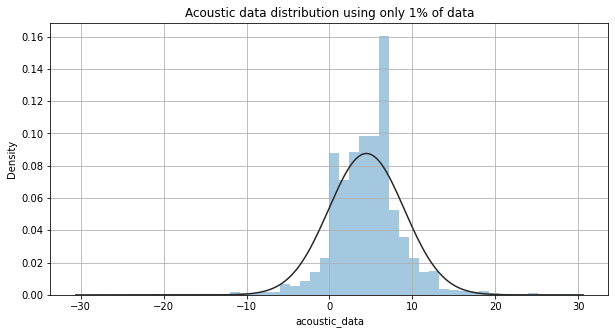

In [20]:
sample = df.sample(frac=0.01)
sample = sample.acoustic_data[sample.acoustic_data.between(-30, 30)] #here we take a range 
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution using only 1% of data")
plt.ylabel('Density')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

Now we take the values of acoustic waves between -30 to 30 and here also we take only 1% of the data from the total data.

Now here we clearly see the distribution and by looking at the plot we can say -10 to 20 values of acoustic wave follow a gaussian/normal distribution of data. Here most acoustic waves have a value is 8 by looking at the bin of the histogram.

<AxesSubplot:title={'center':'Boxplot with sampled acoustic data and time to failure data'}>

<Figure size 720x360 with 0 Axes>

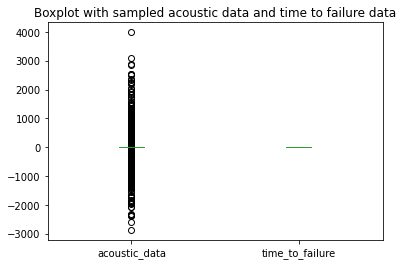

In [14]:
#We plot a box plot on the sub_sample of acoustic_data.
#https://stackoverflow.com/questions/56852380/how-to-plot-huge-dask-dataframe-box-plot-preferably-holoviews
sample = df.sample(frac=0.01)
sample.compute().plot.box(title='Boxplot with sampled acoustic data and time to failure data')

<AxesSubplot:title={'center':'Boxplot with sampled time to failure data'}>

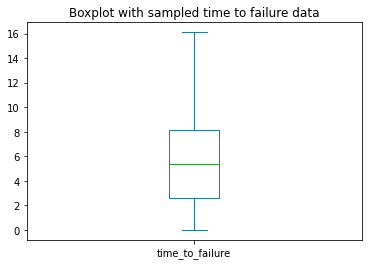

In [17]:
sample = df.sample(frac=0.01)
sample = sample.time_to_failure
sample.compute().plot.box(title='Boxplot with sampled time to failure data')

here we take 1% of the data and plot the box plot for a better understanding of the acoustic wave and outliers.

By looking at the boxplot we can say there are many outliers present we need to remove them and also we can not see what is the 25th and 75th percentile values.

Next, we looking the percentile values and remove the outliers.

In [ ]:
import numpy as np
a = np.array(list(df.acoustic_data))
for i in range(5 , 105,5):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

5  percentile value is -2.0
10  percentile value is 0.0
15  percentile value is 1.0
20  percentile value is 2.0
25  percentile value is 2.0
30  percentile value is 3.0
35  percentile value is 3.0
40  percentile value is 4.0
45  percentile value is 4.0
50  percentile value is 5.0
55  percentile value is 5.0
60  percentile value is 5.0
65  percentile value is 6.0
70  percentile value is 6.0
75  percentile value is 7.0
80  percentile value is 7.0
85  percentile value is 8.0
90  percentile value is 9.0
95  percentile value is 11.0
100  percentile value is 5444.0


In [ ]:
for i in range(90 , 101,1):
    p = np.percentile(a, i)
    print(i,' percentile value is',p)

90  percentile value is 9.0
91  percentile value is 9.0
92  percentile value is 10.0
93  percentile value is 10.0
94  percentile value is 11.0
95  percentile value is 11.0
96  percentile value is 12.0
97  percentile value is 13.0
98  percentile value is 15.0
99  percentile value is 20.0
100  percentile value is 5444.0


In [4]:
a = np.array(list(df.acoustic_data))
for i in np.arange(0.1, 1.1, 0.1):
    b = (99+i)/100* 100
    p = np.percentile(a, b)
    print(b,' percentile value is',p)

99.1  percentile value is 21.0
99.2  percentile value is 22.0
99.3  percentile value is 24.0
99.4  percentile value is 25.0
99.5  percentile value is 28.0
99.6  percentile value is 31.0
99.7  percentile value is 35.0
99.8  percentile value is 42.0
99.9  percentile value is 56.0
100.0  percentile value is 5444.0


Here we have printed the three sections of the percentile values,

In the first section of the percentile values, we print 5 to 100 percentile values with the gap of 5, and from the percentile values, we can say 5 percentile to 95 percentile values lies between the -2 to 11 and above the 95 percentile value acoustic wave value is very high, so now let's zoom to values between the 90 to 100.

In the second section, we print the values between 90 to 100 percentiles,

Here we saw that 90 to 99 percentile values are normal but at 100 percentile value is very high, so we go further and zoom the values between the 99 to 100 percentile values.

In the 3rd section, we zoom further into the values and we saw that 99.9 percentile values lie 56 or less than 56 but here 99.9 to 100 percentile values are lies in the 56 to 5444 range.

So we can say this is an outlier and we have to remove them.

In [4]:
#removing further outliers based on the 5th and 99.9th percentile values
acoustic_data = df[(df.acoustic_data >-2.0) & (df.acoustic_data<56.0)]

In [7]:
#after removing the outliers, number of data points we have
len(acoustic_data)

591155476

In [15]:
#take 1% of data from clean dataset
sample = acoustic_data.sample(frac=0.01)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


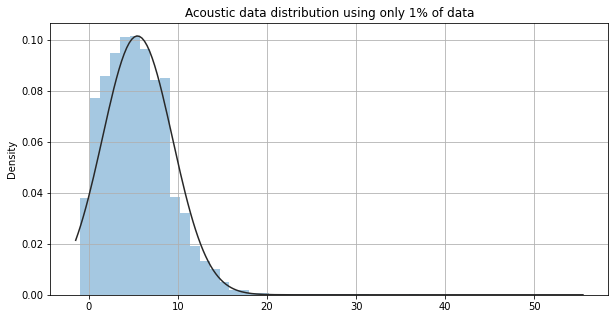

In [10]:
#plot a distribution of the clean data 
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution using only 1% of data")
plt.ylabel('Density')
plt.grid()
ax = sns.distplot(sample, kde=False, fit=stats.norm)

After removing the outliers we take 1% of the sample data we plot a distribution of Acoustic waves and here we see some parts of the data are following the gaussian distribution and most values lie between the -2 to 55.

<AxesSubplot:title={'center':'Boxplot with sampled acoustic data and time to failure data'}>

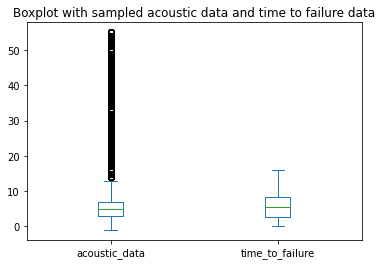

In [16]:
sample.compute().plot.box(title='Boxplot with sampled acoustic data and time to failure data')

After the remove the outliers we can find a 25th and 75th percentile values from the box plot,
here 25th percentile values are 4 and the 75th percentile value is 8.

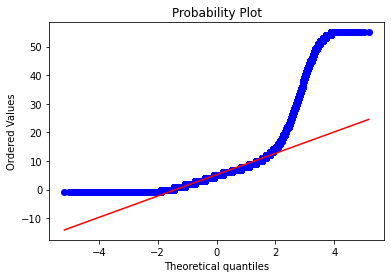

In [13]:
#Q-Q plot for checking if trip-times is log-normal
scipy.stats.probplot(d, plot=plt)
plt.show()

From the Q-Q plot, we can say -2 to 2 values of Acoustic wave is following gaussian distribution.

### 4.2 Time To Failure

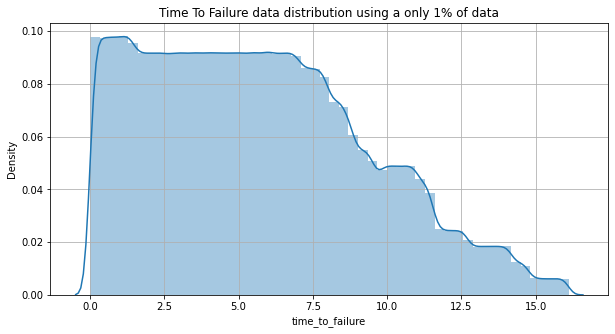

In [20]:
#Pdf of the time to failure data
sample = df.sample(frac=0.01)
plt.figure(figsize=(10,5))
plt.title("Time To Failure data distribution using a only 1% of data")
plt.grid()
ax = sns.distplot(sample.time_to_failure)

Here we plot a distribution of our target variable which is time to failure, here we take only 1% of the data and we can say from the pdf we have a very fewer amount of data we remaining time of next earthquake is more than 15 sec.

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


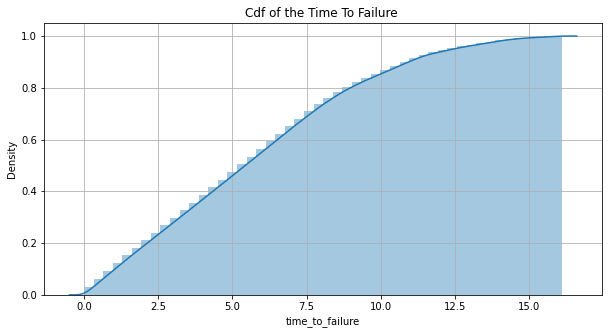

In [7]:
#CDF of the Time To Failure
plt.figure(figsize=(10,5))
plt.title("Cdf of the Time To Failure ")
ax = sns.distplot(sample.time_to_failure, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))
plt.grid()

Here we plot a CDF of time to failure data, and we can say that 80% of data remaining time of the next earthquake is less than 9 sec.

### 4.3 Acoustic data and Time to failure 

In [32]:
#here we take a very very small subset of the data from original data
sample = acoustic_data.sample(frac=0.000001)

In [30]:
len(sample)

59106

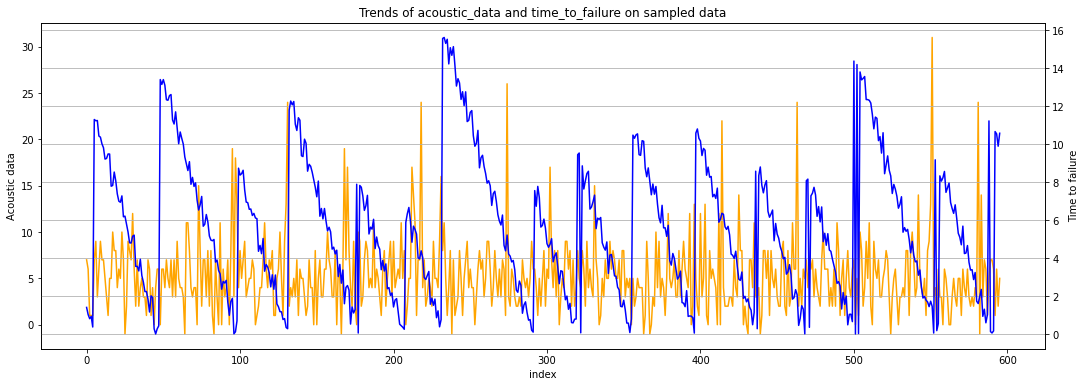

In [39]:
# Plot a Acoustic data and Time To Failure 
#https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title("Trends of acoustic_data and time_to_failure on sampled data")
p1 = sns.lineplot(data=sample.acoustic_data, ax=ax1, color='orange')
p2 = sns.lineplot(data=sample.time_to_failure, ax=ax2 , color = 'blue')
plt.grid()

For the clear visualization, we take very less data for this plot.

Let's see how both variables change over time, the orange line is the acoustic data and the blue one is the time of failure

Here we can see data in the repeating pattern of the acoustic wave and wherever the signal is maxed values this signal is earthquake point, so here we have a total of 16 earthquake signals, and with the signal wave, we also plot the remaining time before the next earthquake.

Here we saw all earthquakes we have some remaining time for the next earthquake, and The shortest time to failure is 1.5 seconds and the longest is around 16 seconds.

# 5 Test data

In [14]:
#read test file
test = pd.read_csv('seg_00184e.csv')
test.head()

acoustic_data
0              8
1              2
2              3
3              8
4              7

In [15]:
test.shape

(150000, 1)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


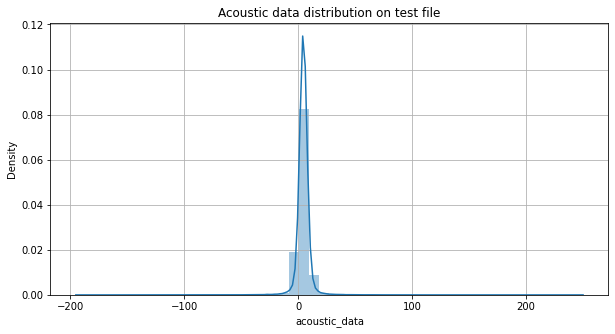

In [19]:
#pdf of test files
plt.figure(figsize=(10,5))
plt.title("Acoustic data distribution on test file")
ax = sns.distplot(test.acoustic_data, label='test_data')
plt.grid()

<Figure size 720x360 with 0 Axes>

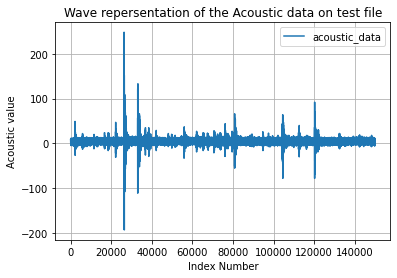

In [25]:
plt.figure(figsize=(10,5))
test.plot()
plt.title('Wave repersentation of the Acoustic data on test file')
plt.xlabel('Index Number')
plt.ylabel('Acoustic value')
plt.grid()

In the test data, we have a different CSV file and each CSV file contain 150,000 values of acoustic data (single column)

Here I have plotted a one-sample file for the understanding and we also plot a distribution plot, and the distribution is very picked.

And the second plot we plot all Acoustic wave values.

# 6 Dickey Fuller Tests

So many tests are available to test given data is Stationary or Non-Stationary and one of the popular tests is **called the dickey fuller test or it is also called Augmented Dickey-fuller(ADF) test.**

A time series is set to be stationary if the statistical property does not change over the time that is mean and variance is constant.

Given the plot of the time to failure, we can say it is Stationary but how we can prove this.

In [4]:
sample = df.sample(frac=0.0001)

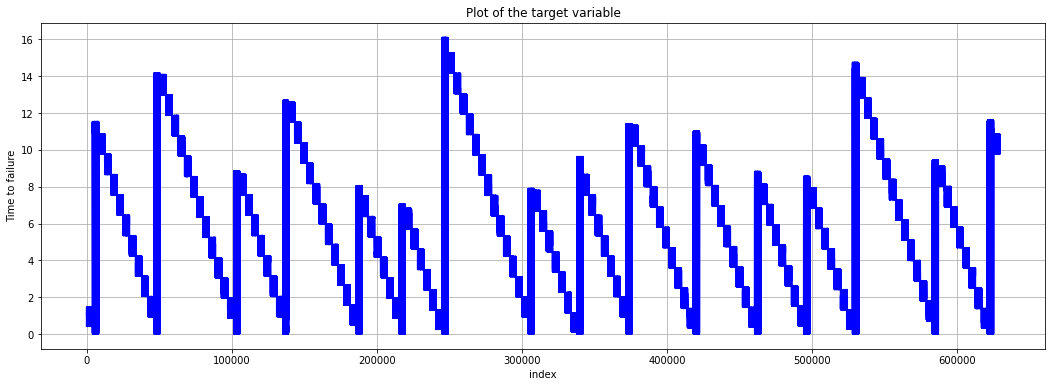

In [6]:
import seaborn as sns
# Plot a Acoustic data and Time To Failure 
#https://www.geeksforgeeks.org/matplotlib-axes-axes-twinx-in-python/
fig, ax1 = plt.subplots(figsize=(18, 6))
ax1.set_xlabel('index')
ax1.set_ylabel('Time to failure')
plt.title("Plot of the target variable")
p2 = sns.lineplot(data=sample.time_to_failure, ax=ax1 , color = 'blue')
plt.grid()

In [5]:
# more about it https://www.youtube.com/watch?v=warCSvy1DMk&t=367s
#H0 is Time Series is Non-Stationary
#H1 is Time Series is Stationary

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
X = sample.time_to_failure.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
# we reject and accept the Null hypothesis at 5% values
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -4.627590
p-value: 0.000115
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


To prove the data is Stationary or not where the ADF test comes into the picture, for any test we have the null hypothesis H0 and alternative hypothesis H1,

So in the ADF test **Null hypothesis H0 is Time Series is Non-Stationary** in nature and the alternate hypothesis **H1 is Time Series is Stationary** in nature

To perform the ADF test we use an adfuller library and this returns three values:-

1:- ADF Statistic value, 2:-p-value, and 3:- Critical Values.

So if the **ADF Statistic < Critical Values then we Reject the H0** which means Time Series is Non-Stationary
if the **ADF Statistic > Critical Values then we Accept the H0** which means Time Series is Non-Stationary.

Or same things you can say using the p-values
if the p-value is very very less reject the H0 and the p-value is high then accept the H0


# 7 **Feature Engineering**

In [ ]:
#https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/data?select=train.csv

In [5]:
#load a data help of pandas 
df = pd.read_csv('train.csv')

In [6]:
#read the data help of pandas
pd.options.display.precision = 13
df.head()

acoustic_data  time_to_failure
0             12     1.4690999832
1              6     1.4690999821
2              8     1.4690999810
3              5     1.4690999799
4              8     1.4690999788

In [7]:
df.shape

(629145480, 2)

##  7.1 **Statistical Based Feature**

As we know we have only one column present in our dataset, so we have to create a new dataset using the help of feature engineering.

Our data is based on the time series so we use time series-based feature engineering techniques.

In [ ]:
#number of samples
629145480//150000

4194

In [ ]:
from tqdm import tqdm
sample_value = 150000
mean_value = []
std_value = []
quantile_value = []
kurtosis = []
skew_val = []
mad_value = []
time_to_left = []

for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    #append last value of the failure 
    time_to_left.append(x.time_to_failure.values[-1])
    #append the mean, std, 95% quantiles values, kurtosis values
    mean_value.append(x.acoustic_data.mean())
    std_value.append(x.acoustic_data.std())
    quantile_value.append(np.quantile(x.acoustic_data, 0.95))
    kurtosis.append(x.acoustic_data.kurtosis())
    skew_val.append(x.acoustic_data.skew())
    mad_value.append(robust.mad(x.acoustic_data))

mean_value = np.array(mean_value)
std_value = np.array(std_value)
quantile_value = np.array(quantile_value)
kurtosis = np.array(kurtosis)
skew_val = np.array(skew_val)
mad_value = np.array(mad_value)
time_to_left = np.array(time_to_left)

100%|██████████| 4194/4194 [00:50<00:00, 83.11it/s]


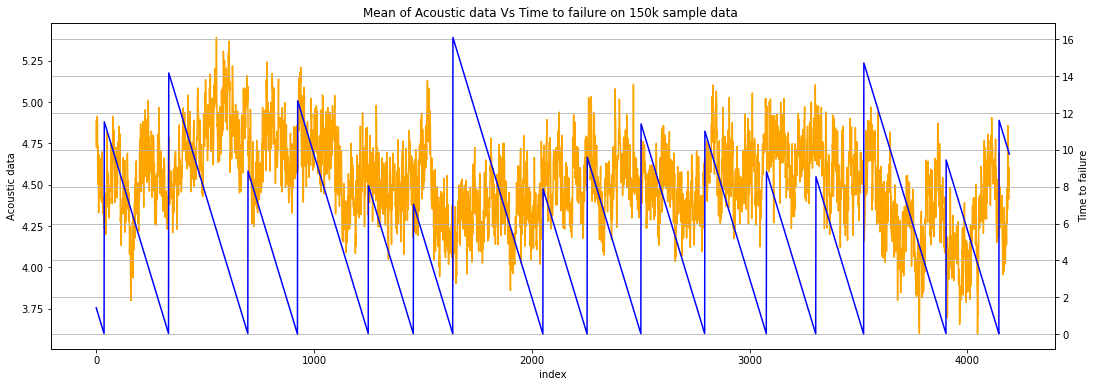

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Mean of Acoustic data Vs Time to failure on 150k sample data ')
p1 = sns.lineplot(data=mean_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

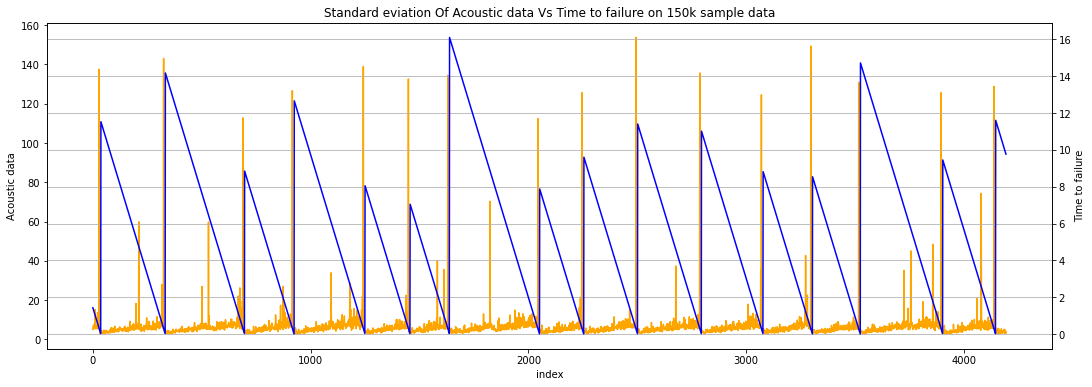

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Standard eviation Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=std_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

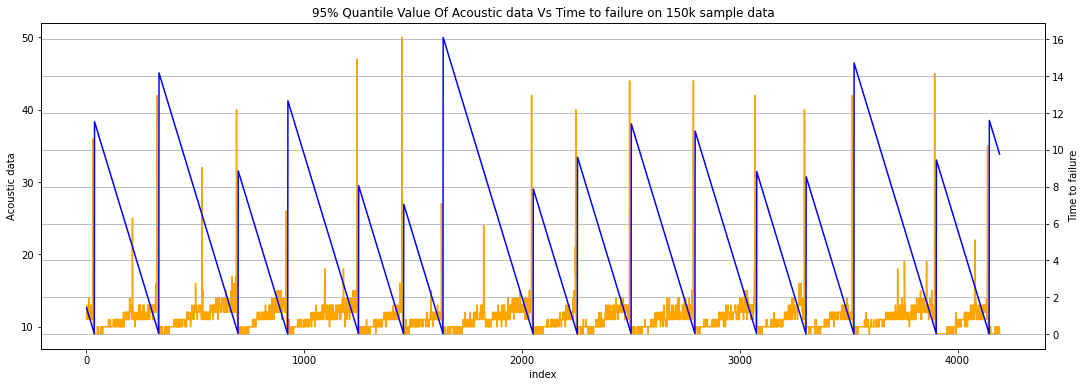

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('95% Quantile Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=quantile_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

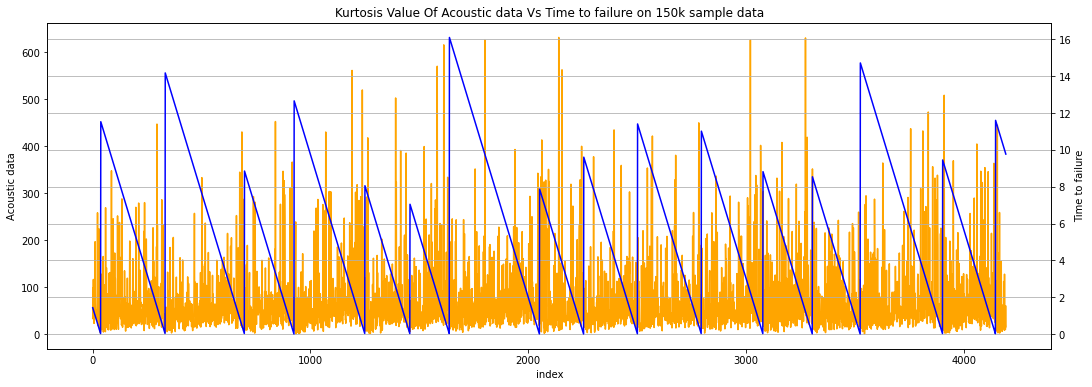

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Kurtosis Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=kurtosis, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

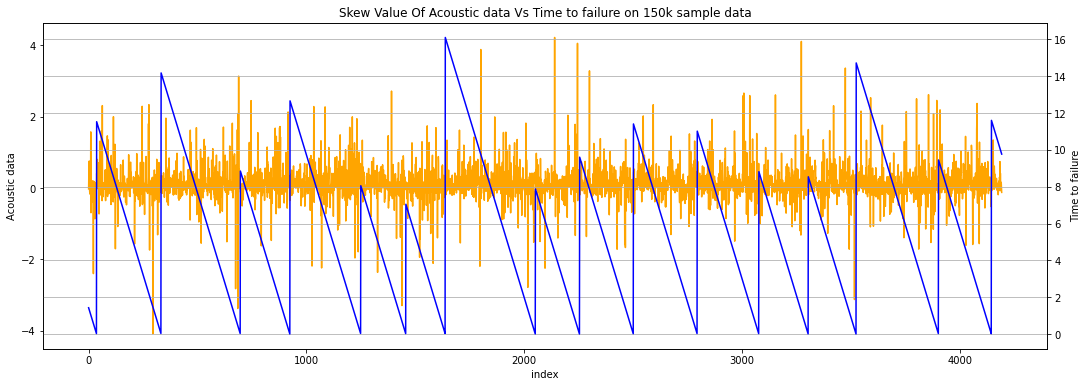

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Skew Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=skew_val, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

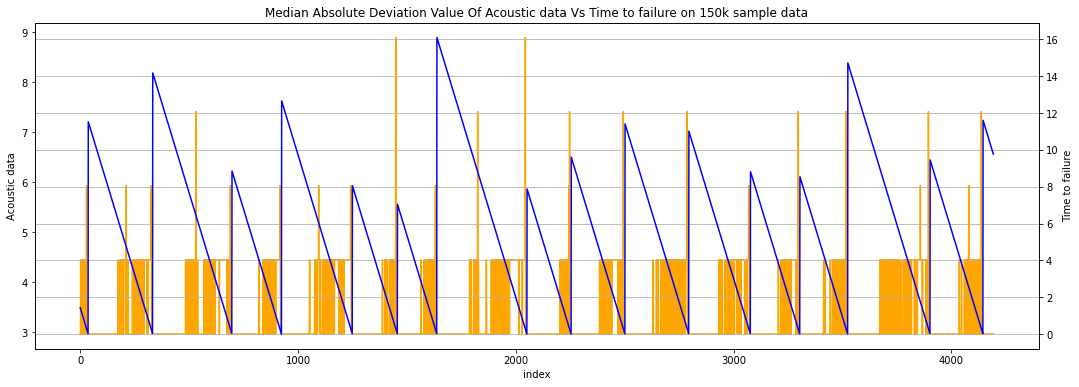

In [ ]:
fig, ax1 = plt.subplots(figsize=(18, 6))
ax2 = ax1.twinx()
ax1.set_xlabel('index')
ax1.set_ylabel('Acoustic data')
ax2.set_ylabel('Time to failure')
plt.title('Median Absolute Deviation Value Of Acoustic data Vs Time to failure on 150k sample data')
p1 = sns.lineplot(data=mad_value, ax=ax1, color='orange')
p2 = sns.lineplot(data=time_to_left, ax=ax2 , color = 'blue')
plt.grid()

For the new feature first, we go with the statistical-based feature like mean, standard deviation, quantile values, skew, etc.
More about time series https://www.analyticsvidhya.com/blog/2019/12/6-powerful-feature-engineering-techniques-time-series/

Here first we create a data samples size of 150k data points from the whole data set and we apply a different statistical, and we plot the graph time_to_failure vs statistical features,

So in your mind, there is one question why do we take the size of the sample as 150k, not another.

Basically, we have to predict time_to_failure on the test dataset, and as we know each test dataset file contains 150k rows of acoustic signal values so we take a sample size as 150k data points.

Our dataset contains a 16 earthquake signal(from Kaggle), and we have to see here can all statistical feature is useful to determine the 16 earthquakes or not.

For the understanding, we create some features and we plot the graph, we take a 6 feature here,
<b><p>1 Mean values on 4194 sample of data. </p></b>
<b><p>2 Standard deviation on 4194 sample of data.</p></b>
<b><p>3 Quantile values on 4194 sample of data.</p></b>
<b><p>4 Kurtosis values on 4194 sample of data.</p></b>
<b><p>5 Skew values on 4194 sample of data.</p></b>
<b><p>6 Median absolute deviation on 4194 sample of data.</p></b>

We are familiar with what is mean and quantiles values but skew and kurtosis are new, In statistics, skewness and kurtosis are two ways to measure the shape of a distribution.
    
As we know skewness is a measure of the asymmetry of the distribution,The skewness value can be positive, zero, negative, or undefined and kurtosis measure the thickness of the tails of the distributions and fatter tail imply the presences of the large number of the outliers.

As we know we have 4194 samples and each sample contains 150k datapoints, now on top of it we apply different techniques such as mean, Standard deviations, etc, and then we observed the feature vs time to failure graphs, and from this graph, we can say that when the acoustic single values are very high time to failure is also high and these all features determine the all earthquakes easily.


###  7.1.1 **Create different Statistical features**

In this section we create the some statistical features mean values, max values, min values, etc.

In [ ]:
def ext_fet(x):
    features = {}
    features['average_value'] = x.values.mean()
    features['std_value'] = x.values.std()
    features['max_value'] = x.values.max()
    features['min_value'] = x.values.min()
    features['kurtosis']  = x.kurtosis()
    features['skew'] = x.skew()
    features['MAD_value'] = robust.mad(x.values)
    #take absolute values
    features['abs_average_value'] = np.abs(x.values).mean()
    features['abs_std_value'] = np.abs(x.values).std()
    features['abs_max_value'] = np.abs(x.values).max()
    features['abs_median'] = np.median(np.abs(x.values))
    #take top 3 quantile
    features['99_quantile'] = np.quantile(x.values, 0.99)
    features['95_quantile'] = np.quantile(x.values, 0.95)
    features['90_quantile'] = np.quantile(x.values, 0.90)
    #take low 3 quantile
    features['01_quantile'] = np.quantile(x.values, 0.01)
    features['05_quantile'] = np.quantile(x.values, 0.05)
    features['10_quantile'] = np.quantile(x.values, 0.10)
    #take interquantile range
    features['interquantile'] = np.quantile(x.values, 0.27) - np.quantile(x.values, 0.25)
    #mean and std of last and first 5k datapoints
    features['mean_of_first_50000'] = x[:50000].values.mean()
    features['mean_of_last_50000'] = x[:-50000].values.mean()

    return features

In [ ]:
feature = []
y = []
sample_value = 150000
for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    y.append(x.time_to_failure.values[-1])
    feature.append(ext_fet(x.acoustic_data))

100%|██████████| 4194/4194 [02:04<00:00, 33.63it/s]


In [ ]:
statistical_feature = pd.DataFrame(feature)
#statistical_feature['time_to_failure'] = y

In [ ]:
statistical_feature.head(2)

average_value        std_value  max_value  min_value          kurtosis  \
0  4.8841133333333  5.1010891268913        104        -98  33.6624812934511   
1  4.7257666666667  6.5888018191643        181       -154  98.7585171787369   

              skew        MAD_value  abs_average_value    abs_std_value  \
0 -0.0240611666282  2.9652044370112    5.5765666666667  4.3333102295538   
1  0.3905605043718  2.9652044370112    5.7341666666667  5.7327578562930   

   abs_max_value  abs_median  99_quantile  95_quantile  90_quantile  \
0            104         5.0         18.0         11.0         10.0   
1            181         5.0         21.0         12.0         10.0   

   01_quantile  05_quantile  10_quantile  interquantile  mean_of_first_50000  \
0         -8.0         -2.0          0.0            0.0               4.9621   
1        -11.0         -2.0          0.0            1.0               4.6984   

   mean_of_last_50000  
0             5.01594  
1             4.69448

### 7.1.2 Create rolling window based features

In this section we create the statistical feature based on the rolling window, rolling window means we take one size of the window/gap and we roll it into our data and after this, we create the features, as eg let suppose we take rolling size 10 that means we take 10-row gap in the data and find the mean values from the 1st sample of the data and now we have mean values of each 10-row data, using this we create the statistical feature same as above,

why do we take the mean values from each window?
So we take mean values because we know mean tells about the centering values of each window,


more about https://www.youtube.com/watch?v=T2mQiesnx8s rolling window.

In this section we create the statistical feature based on the rolling window, rolling window means we take one size of the window/gap and we roll it into our data and after this, we create the features, as eg let suppose we take rolling size 10 that means we take 10-row gap in the data and find the mean values from the 1st sample of the data and now we have mean values of each 10-row data, using this we create the statistical feature same as above,

why do we take the mean values from each window?
So we take mean values because we know mean tells about the centering values of each window,


more about https://www.youtube.com/watch?v=T2mQiesnx8s rolling window.

In [1]:
def rolling_feature(x):
  feature = {}

  for i in [10,50,100,150,200]:
    rolling_mean = x.rolling(i).mean().shift().dropna().values
    rolling_std = x.rolling(i).std().shift().dropna().values

    feature['avg_of_'+ str(i)+'_rolling_mean'] = rolling_mean.mean()
    feature['std_of_'+ str(i)+'_rolling_mean'] = rolling_mean.std()
    feature['1_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.01)
    feature['5_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.05)
    feature['90_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.90)
    feature['95_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.95)
    feature['skew_of'+ str(i)+'_rolling_mean'] = skew(rolling_mean)
    feature['kurtosis_of'+ str(i)+'_rolling_mean'] = kurtosis(rolling_mean)
    feature['min_of'+ str(i)+'_rolling_mean'] = rolling_mean.min()
    feature['max_of'+ str(i)+'_rolling_mean'] = rolling_mean.max()
    feature['interquantile_of' + str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.27) - np.quantile(rolling_mean, 0.25)


    feature['avg_of_'+ str(i)+'_rolling_std'] = rolling_std.mean()
    feature['std_of_'+ str(i)+'_rolling_std'] = rolling_std.std()
    feature['1_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.01)
    feature['5_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.05)
    feature['90_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.90)
    feature['95_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.95)
    feature['skew_of'+ str(i)+'_rolling_std'] = skew(rolling_std)
    feature['kurtosis_of'+ str(i)+'_rolling_std'] = kurtosis(rolling_std)
    feature['min_of'+ str(i)+'_rolling_std'] = rolling_std.min()
    feature['max_of'+ str(i)+'_rolling_std'] = rolling_std.max()
    feature['interquantile_of' + str(i)+'rolling_std'] = np.quantile(rolling_std, 0.27) - np.quantile(rolling_std, 0.25)

  return feature

In [ ]:
rolling_feature_list = []
for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    x = x.acoustic_data
    rolling_feature_list.append(rolling_feature(x))

100%|██████████| 4194/4194 [16:45<00:00,  4.17it/s]


In [ ]:
rolling_feature = pd.DataFrame(rolling_feature_list)
rolling_feature['time_to_failure'] = y

In [ ]:
rolling_feature.head(2)

avg_of_10_rolling_mean  std_of_10_rolling_mean  1_qua_of_10_rolling_mean  \
0         4.8840916061071         2.8018092872692                      -2.4   
1         4.7257310487366         3.9240834665783                      -4.6   

   5_qua_of_10_rolling_mean  90_qua_of_10_rolling_mean  \
0                       1.7                        7.1   
1                       1.2                        7.0   

   95_qua_of_10_rolling_mean  skew_of10_rolling_mean  \
0                        8.1        -0.0396851881341   
1                        8.2         0.4499736703942   

   kurtosis_of10_rolling_mean  min_of10_rolling_mean  max_of10_rolling_mean  \
0            56.3317887323111                  -60.0                   68.5   
1           190.6093658959576                 -128.0                  145.1   

   ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0  ...           2.4319843212271           2.5646220836921   
1  ...           2.4425869801850           2.5551160620298   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0            6.4129454499124            8.4260442882614   
1            6.9139560994205           10.1011586869958   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0         6.4613052514748            61.8068984103732        2.2071378041330   
1         7.4715684982623            74.1596208410411        2.2479415486218   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0       48.7741549486485                 0.0228083955685     1.4307971859  
1       73.8009757394880                 0.0246319829777     1.3914988931  

[2 rows x 111 columns]

In [ ]:
result = pd.concat([statistical_feature, rolling_feature], axis=1, join="inner")

In [ ]:
result.head()

average_value        std_value  max_value  min_value           kurtosis  \
0  4.8841133333333  5.1010891268913        104        -98   33.6624812934511   
1  4.7257666666667  6.5888018191643        181       -154   98.7585171787369   
2  4.9063933333333  6.9673738088289        140       -106   33.5552114069290   
3  4.9022400000000  6.9222821127910        197       -199  116.5481716876284   
4  4.9087200000000  7.3010858526843        145       -126   52.9779048344065   

              skew        MAD_value  abs_average_value    abs_std_value  \
0 -0.0240611666282  2.9652044370112    5.5765666666667  4.3333102295538   
1  0.3905605043718  2.9652044370112    5.7341666666667  5.7327578562930   
2  0.2173905614457  4.4478066555168    6.1526466666667  5.8959250613020   
3  0.7572775364111  2.9652044370112    5.9339600000000  6.0611933961116   
4  0.0645310692714  2.9652044370112    6.1105866666667  6.3294642155416   

   abs_max_value  ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0            104  ...           2.4319843212271           2.5646220836921   
1            181  ...           2.4425869801850           2.5551160620298   
2            140  ...           2.5033846435111           2.6212081969475   
3            199  ...           2.4650249470614           2.5782965433268   
4            145  ...           2.4180851263738           2.5774437104232   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0            6.4129454499124            8.4260442882614   
1            6.9139560994205           10.1011586869958   
2            8.5754909611169           14.0003720336891   
3            7.1695054946737           10.1000343904530   
4            7.4596143823699           12.4861391932917   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0         6.4613052514748            61.8068984103732        2.2071378041330   
1         7.4715684982623            74.1596208410411        2.2479415486218   
2         4.2834174281506            22.5452189605015        2.2910740058982   
3         8.3992111512815           101.1848866765472        2.2111583176082   
4         5.3143097176658            34.3105553818086        2.1598843724863   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0       48.7741549486485                 0.0228083955685     1.4307971859  
1       73.8009757394880                 0.0246319829777     1.3914988931  
2       46.7364459162699                 0.0275514729076     1.3531960947  
3       93.3487818633799                 0.0222614281228     1.3137978019  
4       62.4426891005709                 0.0215127390641     1.2743995091  

[5 rows x 131 columns]

In [ ]:
#plt.subplots(figsize=(50, 30))
#dataplot = sns.heatmap(result.corr(), cmap="YlGnBu", annot=True)
#plt.show()

In [ ]:
result.to_csv('final.csv' , index = False)

In [3]:
train = pd.read_csv('final.csv')
train.head()

average_value  std_value  max_value  min_value    kurtosis      skew  \
0       4.884113   5.101089        104        -98   33.662481 -0.024061   
1       4.725767   6.588802        181       -154   98.758517  0.390561   
2       4.906393   6.967374        140       -106   33.555211  0.217391   
3       4.902240   6.922282        197       -199  116.548172  0.757278   
4       4.908720   7.301086        145       -126   52.977905  0.064531   

   MAD_value  abs_average_value  abs_std_value  abs_max_value  ...  \
0   2.965204           5.576567       4.333310            104  ...   
1   2.965204           5.734167       5.732758            181  ...   
2   4.447807           6.152647       5.895925            140  ...   
3   2.965204           5.933960       6.061193            199  ...   
4   2.965204           6.110587       6.329464            145  ...   

   1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0                  2.431984                  2.564622   
1                  2.442587                  2.555116   
2                  2.503385                  2.621208   
3                  2.465025                  2.578297   
4                  2.418085                  2.577444   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0                   6.412945                   8.426044   
1                   6.913956                  10.101159   
2                   8.575491                  14.000372   
3                   7.169505                  10.100034   
4                   7.459614                  12.486139   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0                6.461305                   61.806898               2.207138   
1                7.471568                   74.159621               2.247942   
2                4.283417                   22.545219               2.291074   
3                8.399211                  101.184887               2.211158   
4                5.314310                   34.310555               2.159884   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0              48.774155                        0.022808         1.430797  
1              73.800976                        0.024632         1.391499  
2              46.736446                        0.027551         1.353196  
3              93.348782                        0.022261         1.313798  
4              62.442689                        0.021513         1.274400  

[5 rows x 131 columns]

In [4]:
train.shape

(4194, 131)

# 8  **Apply ML Model**

In [18]:
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import figure
from sklearn.metrics import mean_absolute_percentage_error

In [6]:
y = train.time_to_failure
x = train.drop('time_to_failure' , axis = 1)

#### Split the data into train and test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [10]:
print(x_train.shape)
print(x_test.shape)

(3355, 130)
(839, 130)


## 8.1 **KNN Regression**

In [ ]:
classification  = KNeighborsRegressor()
a = {'n_neighbors':[3,5,7,9,11,15,17,19]}
clf = RandomizedSearchCV(classification, a, cv= 5, scoring='neg_mean_absolute_error',return_train_score=True)
clf.fit(x_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


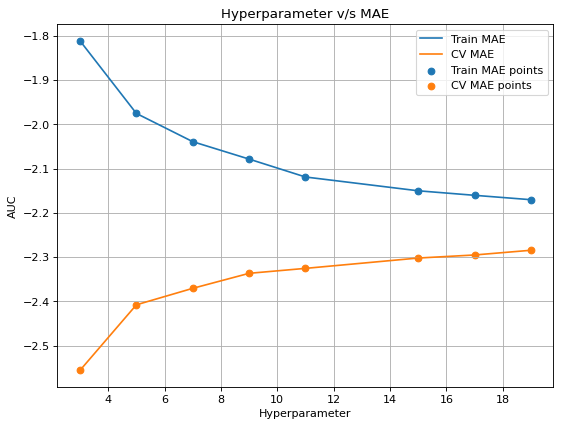

In [ ]:
#train_auc = -1*train_auc
#cv_auc    = -1*cv_auc
figure(figsize=(8, 6), dpi=80)
plt.plot(a['n_neighbors'] , train_auc, label='Train MAE')
plt.plot(a['n_neighbors'] , cv_auc, label='CV MAE')
plt.scatter(a['n_neighbors'], train_auc, label='Train MAE points')
plt.scatter(a['n_neighbors'], cv_auc, label='CV MAE points')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter v/s MAE")
plt.grid()

In [ ]:
clf = KNeighborsRegressor(n_neighbors = 11)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
y_pre_train = clf.predict(x_train)
y_pre_test = clf.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test))

The mean absolute error on train data ==> 2.0985987695346564
The mean absolute error on test  data ==> 2.347933273473607


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test))

The mean absolute percentage error on train data ==> 3.858136758405626
The mean absolute percentage error on test  data ==> 3.971615890350946


Here we apply a very basic model which is KNN here we do hyperparameters and then we build the model.

form the MAE we can say there is no overfitting and underfitting and here we find a percentage error also 3.8%
we apply more models and try to minimize the percentage error and MAE.

## 8.2 Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train , y_train)

LinearRegression()

In [ ]:
train_pre = lr_clf.predict(x_train)
test_pre  = lr_clf.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 2.026519029784439
The mean absolute error on test  data ==> 2.1282038707276283


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 4.087696563946383
The mean absolute percentage error on test  data ==> 3.8978305389235377


Here we apply a logistic regression and here also model is not underfitting and not overfitting.

## 8.3 **Xgboost Regression**

In [ ]:
import lightgbm as lgb
#Checking for various parameters
clf2 = lgb.LGBMRegressor(n_jobs=-1) 
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50]} 
clf2 = RandomizedSearchCV(clf2, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf2.fit(x_train, y_train)
print(clf2.best_params_)

{'n_estimators': 50, 'max_depth': 5}


In [ ]:
clf_2 = lgb.LGBMRegressor(max_depth = 5 ,n_estimators = 50)
clf_2.fit(x_train , y_train)

LGBMRegressor(max_depth=5, n_estimators=50)

In [ ]:
train_pre = clf_2.predict(x_train)
test_pre  = clf_2.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 2.026519029784439
The mean absolute error on test  data ==> 2.1282038707276283


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 4.087696563946383
The mean absolute percentage error on test  data ==> 3.8978305389235377


Here we apply the xgboost regression and the model is work well here

## 8.4 **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
classification  = RandomForestRegressor(n_jobs = -1)
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50] } 
clf3 = RandomizedSearchCV(classification, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf3.fit(x_train, y_train)
print(clf3.best_params_)

{'n_estimators': 500, 'max_depth': 5}


In [ ]:
clf_3 = RandomForestRegressor(max_depth = 5 ,n_estimators = 500 )
clf_3.fit(x_train , y_train) 

RandomForestRegressor(max_depth=5, n_estimators=500)

In [ ]:
train_pre = clf_3.predict(x_train)
test_pre  = clf_3.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.901967224593103
The mean absolute error on test  data ==> 2.0927767100173114


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 3.4949607383075296
The mean absolute percentage error on test  data ==> 4.048414005648991


Here we apply the random forest regression and by looking at the value of percentage error here we are very little bit overfitting, maybe it occurs because of less amount of fewer data.

## 8.5  **Use both model xgboost and random forest**

In [ ]:
xgb_train = clf_2.predict(x_train)
rf_train  = train_pre = clf_3.predict(x_train)

In [ ]:
train_pre_both = (xgb_train + rf_train) / 2

In [ ]:
xgb_test = clf_2.predict(x_test)
rf_test  = train_pre = clf_3.predict(x_test)

In [ ]:
test_pre_both = (xgb_test + rf_test) / 2

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre_both))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre_both))

The mean absolute error on train data ==> 1.7623746001056328
The mean absolute error on test  data ==> 2.0925963795066798


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre_both))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre_both))

The mean absolute percentage error on train data ==> 3.1910344504635035
The mean absolute percentage error on test  data ==> 4.117506155884529


Let's combine the XGboost and RF model and we predict the value,
by looking at the value of percentage error, and by looking at this value, we can say 
model is little bit overfitting it may be because of the less number of train data but the MAE is very less than the other model.

In [10]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["KNN", "2.098", "2.347", "3.85 %" , '3.97 %'])
myTable.add_row(["Linear Regression", "2.026", "2.128", "4.08 %" , '3.89 %'])
myTable.add_row(["Xgboost", "2.026", "2.128", "4.08 %" , '3.89 %'])
myTable.add_row(["Random Forest", "1.909", "2.092", "3.49 %" , '4.08 %'])
myTable.add_row(["Xgboost + RF", "1.762", "2.092", "3.19 %" , '4.11 %'])


print(myTable)

+-------------------+--------------+-------------+---------------+--------------+
|     Model Name    | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------+--------------+-------------+---------------+--------------+
|        KNN        |    2.098     |    2.347    |     3.85 %    |    3.97 %    |
| Linear Regression |    2.026     |    2.128    |     4.08 %    |    3.89 %    |
|      Xgboost      |    2.026     |    2.128    |     4.08 %    |    3.89 %    |
|   Random Forest   |    1.909     |    2.092    |     3.49 %    |    4.08 %    |
|    Xgboost + RF   |    1.762     |    2.092    |     3.19 %    |    4.11 %    |
+-------------------+--------------+-------------+---------------+--------------+


Here from all the models, we say that the combination of xgboost and Random forest is the winner here

### To improve the MAE and MAPE we have to come up with more feature engineering.

To improve the MAE we come up with the new features, basically, we have a signal value so here we convert signal values into a spectrogram image and use this image as a feature, here we take the first 500 pixels values of the spectrogram image as a feature. 

Then we concatenate this feature with our old feature and create the new features. and we apply all algorithms and look at the performance

### So till the time we show a basic feature, to improve the model performance we have to come up with the new feature engineering

### In section 9:
Here we use spectrogram Image pixel as a Feature, in this section we take first 500 pixel as features

### In section 10:
Here we use same things as section 9 but here we take only 200 pixel as features.

### In section 11
Here we take a frequenc of the spectrogram as features 

### In section 12 
Here we create total 4 differet feature datasets, that is explain in section 8,9,10, and 11. Here in section 12 we apply ensemble based stacking model in all this 4 datasets.

# 9 Spectrogram Image Feature with 500 pixel

In [ ]:
from scipy import signal
pixel_intensity = []
sample_value = 150000
for i in tqdm(range(4194)):
  x = df.iloc[i*sample_value :i*sample_value + sample_value]
  frequencies, times, spectrogram = signal.spectrogram(x.acoustic_data)
  pixel_intensity.append(spectrogram.flatten()[:500])

100%|██████████| 4194/4194 [00:48<00:00, 86.98it/s]


In [ ]:
image_pixel_feature = []
#pixel_intensity = []
for i in range(500):
    image_pixel_feature.append('PI' + str(i))
    #pixel_intensity.append(spectrogram.flatten()[:500])

img_df = pd.DataFrame(pixel_intensity , columns = image_pixel_feature)

In [ ]:
img_df.head()

PI0             PI1             PI2             PI3  \
0  0.237496783591  0.206341830532  0.316963138114  0.802695347872   
1  0.263611102679  0.029540420554  0.188121613420  0.009454775533   
2  5.924291386751  0.158864038068  1.824142854684  0.059718676450   
3  0.002804307081  0.024381310151  0.834677107898  1.051100176152   
4  0.414149277423  0.035607997886  2.693832984206  0.028724506648   

               PI4              PI5              PI6              PI7  \
0   0.021813379204   1.728457205248  26.881178433008  18.806085299206   
1   0.184859423450   0.017694018433   1.898907344197   0.164767624946   
2   0.122156685038   0.536493056709   8.072795595520   2.323794221268   
3   0.007693909756   1.221588505108   0.778420071522   1.806977347299   
4  12.456280188404  13.497332786248   0.587193160282  23.230865937527   

               PI8             PI9  ...           PI490           PI491  \
0   0.027118199383  7.525244719912  ...  0.610130457773  1.799158901557   
1   0.027639103586  0.524800563856  ...  0.440024811042  3.150277790317   
2   6.089645453655  0.125674595314  ...  0.832466294452  1.678889587183   
3   0.413938967858  0.027829785936  ...  0.202675430561  0.001974141367   
4  10.546467132093  0.810509444961  ...  0.278728952487  1.822480397539   

            PI492            PI493           PI494           PI495  \
0  0.039803559302   2.125154015277  1.056155468060  0.009533961509   
1  4.803510558157   0.467137133877  0.065335571358  0.267289238705   
2  2.066716810061  23.357472553779  0.042009809714  0.047419702412   
3  0.005573115878   1.935222484390  3.567761316458  0.051733273460   
4  0.000406990771   2.722181348295  1.189169754150  0.101369136957   

            PI496           PI497           PI498           PI499  
0  0.098558418596  0.106395402947  0.333942203253  1.193621770079  
1  0.494729573846  0.387702511888  0.238403798910  0.867104973207  
2  0.013596402923  0.492048470922  0.001281964409  0.173632720726  
3  2.953840167478  0.538759423576  0.037323605760  0.244615529905  
4  0.000043812841  0.712276792093  0.788871759712  0.728083858136  

[5 rows x 500 columns]

In [ ]:
df_f = pd.read_csv('final.csv')
df_f.head()

average_value       std_value  max_value  min_value          kurtosis  \
0  4.884113333333  5.101089126891        104        -98   33.662481293451   
1  4.725766666667  6.588801819164        181       -154   98.758517178737   
2  4.906393333333  6.967373808829        140       -106   33.555211406929   
3  4.902240000000  6.922282112791        197       -199  116.548171687628   
4  4.908720000000  7.301085852684        145       -126   52.977904834406   

             skew       MAD_value  abs_average_value   abs_std_value  \
0 -0.024061166628  2.965204437011     5.576566666667  4.333310229554   
1  0.390560504372  2.965204437011     5.734166666667  5.732757856293   
2  0.217390561446  4.447806655517     6.152646666667  5.895925061302   
3  0.757277536411  2.965204437011     5.933960000000  6.061193396112   
4  0.064531069271  2.965204437011     6.110586666667  6.329464215542   

   abs_max_value  ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0            104  ...            2.431984321227            2.564622083692   
1            181  ...            2.442586980185            2.555116062030   
2            140  ...            2.503384643511            2.621208196947   
3            199  ...            2.465024947061            2.578296543327   
4            145  ...            2.418085126374            2.577443710423   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0             6.412945449912             8.426044288261   
1             6.913956099420            10.101158686996   
2             8.575490961117            14.000372033689   
3             7.169505494674            10.100034390453   
4             7.459614382370            12.486139193292   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0          6.461305251475             61.806898410373         2.207137804133   
1          7.471568498262             74.159620841041         2.247941548622   
2          4.283417428151             22.545218960501         2.291074005898   
3          8.399211151281            101.184886676547         2.211158317608   
4          5.314309717666             34.310555381809         2.159884372486   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0        48.774154948649                  0.022808395568     1.4307971859  
1        73.800975739488                  0.024631982978     1.3914988931  
2        46.736445916270                  0.027551472908     1.3531960947  
3        93.348781863380                  0.022261428123     1.3137978019  
4        62.442689100571                  0.021512739064     1.2743995091  

[5 rows x 131 columns]

### concatenate both data frame

In [ ]:
new = pd.concat([img_df, df_f], axis=1, join="inner")
new.head(3)

PI0             PI1             PI2             PI3  \
0  0.237496783591  0.206341830532  0.316963138114  0.802695347872   
1  0.263611102679  0.029540420554  0.188121613420  0.009454775533   
2  5.924291386751  0.158864038068  1.824142854684  0.059718676450   

              PI4             PI5              PI6              PI7  \
0  0.021813379204  1.728457205248  26.881178433008  18.806085299206   
1  0.184859423450  0.017694018433   1.898907344197   0.164767624946   
2  0.122156685038  0.536493056709   8.072795595520   2.323794221268   

              PI8             PI9  ...  1_qua_of_200_rolling_std  \
0  0.027118199383  7.525244719912  ...            2.431984321227   
1  0.027639103586  0.524800563856  ...            2.442586980185   
2  6.089645453655  0.125674595314  ...            2.503384643511   

   5_qua_of_200_rolling_std  90_qua_of_200_rolling_std  \
0            2.564622083692             6.412945449912   
1            2.555116062030             6.913956099420   
2            2.621208196947             8.575490961117   

   95_qua_of_200_rolling_std  skew_of200_rolling_std  \
0             8.426044288261          6.461305251475   
1            10.101158686996          7.471568498262   
2            14.000372033689          4.283417428151   

   kurtosis_of200_rolling_std  min_of200_rolling_std  max_of200_rolling_std  \
0             61.806898410373         2.207137804133        48.774154948649   
1             74.159620841041         2.247941548622        73.800975739488   
2             22.545218960501         2.291074005898        46.736445916270   

   interquantile_of200rolling_std  time_to_failure  
0                  0.022808395568     1.4307971859  
1                  0.024631982978     1.3914988931  
2                  0.027551472908     1.3531960947  

[3 rows x 631 columns]

### split data into train and test

In [ ]:
train = new
y = train.time_to_failure
x = train.drop('time_to_failure' , axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(3355, 630)
(839, 630)


## 9.1 **KNN**

In [ ]:
classification  = KNeighborsRegressor()
a = {'n_neighbors':[3,5,7,9,11,15,17,19]}
clf = RandomizedSearchCV(classification, a, cv= 5, scoring='neg_mean_absolute_error',return_train_score=True)
clf.fit(x_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [ ]:
print(clf.best_params_)

{'n_neighbors': 15}


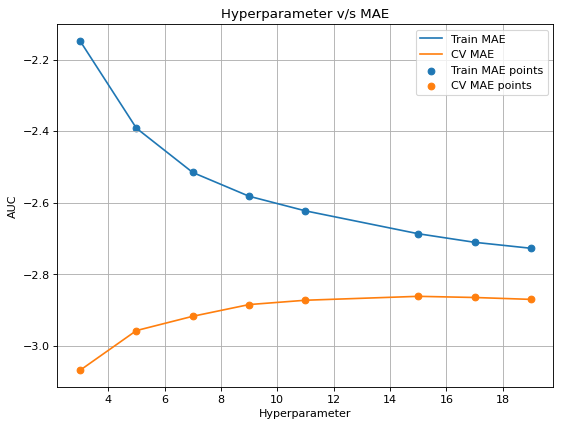

In [ ]:
#train_auc = -1*train_auc
#cv_auc    = -1*cv_auc
figure(figsize=(8, 6), dpi=80)
plt.plot(a['n_neighbors'] , train_auc, label='Train MAE')
plt.plot(a['n_neighbors'] , cv_auc, label='CV MAE')
plt.scatter(a['n_neighbors'], train_auc, label='Train MAE points')
plt.scatter(a['n_neighbors'], cv_auc, label='CV MAE points')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter v/s MAE")
plt.grid()

In [ ]:
clf = KNeighborsRegressor(n_neighbors = 15)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [ ]:
y_pre_train = clf.predict(x_train)
y_pre_test = clf.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test))

The mean absolute error on train data ==> 2.675886369686157
The mean absolute error on test  data ==> 2.89947024328421


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test))

The mean absolute percentage error on train data ==> 4.559665260311422
The mean absolute percentage error on test  data ==> 4.772116996438487


At first, we apply a KNN to the data and we find that the model is well fitted

## 9.2 Logistic regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train , y_train)

LinearRegression()

In [ ]:
train_pre = lr_clf.predict(x_train)
test_pre  = lr_clf.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.8812833171974277
The mean absolute error on test  data ==> 22.718520947597145


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 3.9225325485697176
The mean absolute percentage error on test  data ==> 69.1215749894216


Here we apply the logistic regression and we find that the mode is very overfitting on the dataset.

## 9.3 **XGBOOST**

In [ ]:
import lightgbm as lgb
#Checking for various parameters
clf2 = lgb.LGBMRegressor(n_jobs=-1) 
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50]} 
clf2 = RandomizedSearchCV(clf2, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf2.fit(x_train, y_train)
print(clf2.best_params_)

{'n_estimators': 50, 'max_depth': 50}


In [ ]:
clf_2 = lgb.LGBMRegressor(max_depth = 50 ,n_estimators = 50)
clf_2.fit(x_train , y_train)

LGBMRegressor(max_depth=50, n_estimators=50)

In [ ]:
train_pre = clf_2.predict(x_train)
test_pre  = clf_2.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.093070694609662
The mean absolute error on test  data ==> 2.0624779097399495


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 1.8615090007780815
The mean absolute percentage error on test  data ==> 3.7215736871787075


Here we apply the xgboost as the next model and here we can see that the model is slightly overfitting, it may be less amount of the data.

## 9.4 **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
classification  = RandomForestRegressor(n_jobs = -1)
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50] } 
clf3 = RandomizedSearchCV(classification, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf3.fit(x_train, y_train)
print(clf3.best_params_)

{'n_estimators': 1000, 'max_depth': 10}


In [ ]:
clf_3 = RandomForestRegressor(max_depth = 10,n_estimators = 1000 )
clf_3.fit(x_train , y_train) 

RandomForestRegressor(max_depth=10, n_estimators=1000)

In [ ]:
train_pre = clf_3.predict(x_train)
test_pre  = clf_3.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.252698473963603
The mean absolute error on test  data ==> 2.0984440894305556


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 2.157720952500107
The mean absolute percentage error on test  data ==> 4.045770207328697


Here is also the same situation present as the xgboost model

In [3]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["KNN", "2.675", "2.899", "4.55 %" , '4.77 %'])
myTable.add_row(["Linear Regression", "1.880", "22.71", "3.92 %" , '69.1 %'])
myTable.add_row(["Xgboost", "1.093", "2.063", "1.86 %" , '3.72 %'])
myTable.add_row(["Random Forest", "1.252", "2.098", "2.51 %" , '4.04 %'])


print(myTable)

+-------------------+--------------+-------------+---------------+--------------+
|     Model Name    | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------+--------------+-------------+---------------+--------------+
|        KNN        |    2.675     |    2.899    |     4.55 %    |    4.77 %    |
| Linear Regression |    1.880     |    22.71    |     3.92 %    |    69.1 %    |
|      Xgboost      |    1.093     |    2.063    |     1.86 %    |    3.72 %    |
|   Random Forest   |    1.252     |    2.098    |     2.51 %    |    4.04 %    |
+-------------------+--------------+-------------+---------------+--------------+


### best model is xgb

### Conclusion for the spectrogram image data

Here this pixel-based feature engineering works better than the normal simple feature but we will also try the other feature engineering technique and then we make our decision.

# 10 More Feature Engineering

In [6]:
df = pd.read_csv('train.csv')

In [7]:
pd.options.display.precision = 12
df.head()

acoustic_data  time_to_failure
0             12     1.4690999832
1              6     1.4690999821
2              8     1.4690999810
3              5     1.4690999799
4              8     1.4690999788

### **More Statistical Based Feature**

In [73]:
def ext_fet(x):
    features = {}
    features['average_value'] = x.values.mean()
    features['std_value'] = x.values.std()
    features['max_value'] = x.values.max()
    features['min_value'] = x.values.min()
    features['kurtosis']  = x.kurtosis()
    features['skew'] = x.skew()
    features['MAD_value'] = robust.mad(x.values)
    features['median'] = x.median()
    features['mad']    = x.mad()
    #take absolute values
    features['abs_average_value'] = np.abs(x.values).mean()
    features['abs_std_value'] = np.abs(x.values).std()
    features['abs_max_value'] = np.abs(x.values).max()
    features['abs_median'] = np.median(np.abs(x.values))
    #take top 3 quantile
    features['99_quantile'] = np.quantile(x.values, 0.99)
    features['95_quantile'] = np.quantile(x.values, 0.95)
    features['90_quantile'] = np.quantile(x.values, 0.90)
    #take low 3 quantile
    features['01_quantile'] = np.quantile(x.values, 0.01)
    features['05_quantile'] = np.quantile(x.values, 0.05)
    features['10_quantile'] = np.quantile(x.values, 0.10)
    #take interquantile range
    features['interquantile'] = np.quantile(x.values, 0.27) - np.quantile(x.values, 0.25)
    #mean and std of last and first 70k datapoints
    features['mean_of_first_70k'] = x[:70000].values.mean()
    features['mean_of_last_70k'] = x[-70000:].values.mean()

    #max and min of the first and last 70k data pts 
    features['max_of_first_70k'] = x[:70000].values.max()
    features['min_of_last_70k'] = x[-70000:].values.min()
    features['abs_max_of_first_70k'] = np.abs(x[:70000].values.max())
    features['abs_min_of_last_70k'] = np.abs(x[-70000:].values.min())

    #std of the first and last 70k data pts
    features['std_value_first_70k'] = x[:70000].values.std()
    features['std_value_last_70k'] = x[-70000:].values.std()

    #skew of the first and last 70k data pts
    features['skew_value_first_70k'] = x[:70000].skew()
    features['skew_value_last_70k'] = x[-70000:].skew()

    #skew of the first and last 70k data pts
    features['kurtosis_value_first_70k'] = x[:70000].kurtosis()
    features['kurtosis_value_last_70k'] = x[-70000:].kurtosis()

    #median of the first and last 70k data pts
    features['median_value_first_70k'] = x[:70000].median()
    features['median_value_last_70k'] = x[-70000:].median()
    return features

In [ ]:
feature = []
y = []
sample_value = 150000
for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    y.append(x.time_to_failure.values[-1])
    feature.append(ext_fet(x.acoustic_data))

100%|██████████| 4194/4194 [04:55<00:00, 14.19it/s]


In [ ]:
statistical_feature = pd.DataFrame(feature)
#statistical_feature['time_to_failure'] = y

In [ ]:
statistical_feature.head(2)

average_value       std_value  max_value  min_value         kurtosis  \
0  4.884113333333  5.101089126891        104        -98  33.662481293451   
1  4.725766666667  6.588801819164        181       -154  98.758517178737   

             skew       MAD_value  median             mad  abs_average_value  \
0 -0.024061166628  2.965204437011     5.0  3.263401356801     5.576566666667   
1  0.390560504372  2.965204437011     5.0  3.574301851112     5.734166666667   

   ...  abs_max_of_first_70k  abs_min_of_last_70k  std_value_first_70k  \
0  ...                   104                   37       6.092087644575   
1  ...                   181                  115       7.987319961192   

   std_value_last_70k  skew_value_first_70k  skew_value_last_70k  \
0      4.045503292899       -0.075334209680       0.095606211806   
1      5.264445578112        0.525361650069      -0.163561010507   

   kurtosis_value_first_70k  kurtosis_value_last_70k  median_value_first_70k  \
0           33.069202527778           8.611476862027                     5.0   
1           87.841581952536          50.646430045699                     5.0   

   median_value_last_70k  
0                    5.0  
1                    5.0  

[2 rows x 34 columns]

### **Rolling window based features**

more about https://www.youtube.com/watch?v=T2mQiesnx8s rolling window

In [74]:
def rolling_feature(x):
  feature = {}

  for i in [10,50,100,150,200]:
    rolling_mean = x.rolling(i).mean().shift().dropna().values
    rolling_std = x.rolling(i).std().shift().dropna().values

    feature['avg_of_'+ str(i)+'_rolling_mean'] = rolling_mean.mean()
    feature['std_of_'+ str(i)+'_rolling_mean'] = rolling_mean.std()
    feature['1_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.01)
    feature['5_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.05)
    feature['90_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.90)
    feature['95_qua_of_'+ str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.95)
    feature['skew_of'+ str(i)+'_rolling_mean'] = skew(rolling_mean)
    feature['kurtosis_of'+ str(i)+'_rolling_mean'] = kurtosis(rolling_mean)
    feature['min_of'+ str(i)+'_rolling_mean'] = rolling_mean.min()
    feature['max_of'+ str(i)+'_rolling_mean'] = rolling_mean.max()
    feature['interquantile_of' + str(i)+'_rolling_mean'] = np.quantile(rolling_mean, 0.27) - np.quantile(rolling_mean, 0.25)


    feature['avg_of_'+ str(i)+'_rolling_std'] = rolling_std.mean()
    feature['std_of_'+ str(i)+'_rolling_std'] = rolling_std.std()
    feature['1_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.01)
    feature['5_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.05)
    feature['90_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.90)
    feature['95_qua_of_'+ str(i)+'_rolling_std'] = np.quantile(rolling_std, 0.95)
    feature['skew_of'+ str(i)+'_rolling_std'] = skew(rolling_std)
    feature['kurtosis_of'+ str(i)+'_rolling_std'] = kurtosis(rolling_std)
    feature['min_of'+ str(i)+'_rolling_std'] = rolling_std.min()
    feature['max_of'+ str(i)+'_rolling_std'] = rolling_std.max()
    feature['interquantile_of' + str(i)+'rolling_std'] = np.quantile(rolling_std, 0.27) - np.quantile(rolling_std, 0.25)

  return feature

In [ ]:
rolling_feature_list = []
for i in tqdm(range(4194)):
    x = df.iloc[i*sample_value :i*sample_value + sample_value]
    x = x.acoustic_data
    rolling_feature_list.append(rolling_feature(x))

100%|██████████| 4194/4194 [44:39<00:00,  1.57it/s]


In [ ]:
rolling_feature = pd.DataFrame(rolling_feature_list)
rolling_feature['time_to_failure'] = y

In [ ]:
rolling_feature.head(2)

avg_of_10_rolling_mean  std_of_10_rolling_mean  1_qua_of_10_rolling_mean  \
0          4.884091606107          2.801809287269                      -2.4   
1          4.725731048737          3.924083466578                      -4.6   

   5_qua_of_10_rolling_mean  90_qua_of_10_rolling_mean  \
0                       1.7                        7.1   
1                       1.2                        7.0   

   95_qua_of_10_rolling_mean  skew_of10_rolling_mean  \
0                        8.1         -0.039685188134   
1                        8.2          0.449973670394   

   kurtosis_of10_rolling_mean  min_of10_rolling_mean  max_of10_rolling_mean  \
0             56.331788732311                  -60.0                   68.5   
1            190.609365895958                 -128.0                  145.1   

   ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0  ...            2.431984321227            2.564622083692   
1  ...            2.442586980185            2.555116062030   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0             6.412945449912             8.426044288261   
1             6.913956099420            10.101158686996   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0          6.461305251475             61.806898410373         2.207137804133   
1          7.471568498262             74.159620841041         2.247941548622   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0        48.774154948649                  0.022808395568     1.4307971859  
1        73.800975739488                  0.024631982978     1.3914988931  

[2 rows x 111 columns]

In [ ]:
result = pd.concat([statistical_feature, rolling_feature], axis=1, join="inner")

In [ ]:
result.head()

average_value       std_value  max_value  min_value          kurtosis  \
0  4.884113333333  5.101089126891        104        -98   33.662481293451   
1  4.725766666667  6.588801819164        181       -154   98.758517178737   
2  4.906393333333  6.967373808829        140       -106   33.555211406929   
3  4.902240000000  6.922282112791        197       -199  116.548171687628   
4  4.908720000000  7.301085852684        145       -126   52.977904834406   

             skew       MAD_value  median             mad  abs_average_value  \
0 -0.024061166628  2.965204437011     5.0  3.263401356801     5.576566666667   
1  0.390560504372  2.965204437011     5.0  3.574301851112     5.734166666667   
2  0.217390561446  4.447806655517     5.0  3.948411362133     6.152646666667   
3  0.757277536411  2.965204437011     5.0  3.647117068799     5.933960000000   
4  0.064531069271  2.965204437011     5.0  3.826051623466     6.110586666667   

   ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0  ...            2.431984321227            2.564622083692   
1  ...            2.442586980185            2.555116062030   
2  ...            2.503384643511            2.621208196947   
3  ...            2.465024947061            2.578296543327   
4  ...            2.418085126374            2.577443710423   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0             6.412945449912             8.426044288261   
1             6.913956099420            10.101158686996   
2             8.575490961117            14.000372033689   
3             7.169505494674            10.100034390453   
4             7.459614382370            12.486139193292   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0          6.461305251475             61.806898410373         2.207137804133   
1          7.471568498262             74.159620841041         2.247941548622   
2          4.283417428151             22.545218960501         2.291074005898   
3          8.399211151281            101.184886676547         2.211158317608   
4          5.314309717666             34.310555381809         2.159884372486   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0        48.774154948649                  0.022808395568     1.4307971859  
1        73.800975739488                  0.024631982978     1.3914988931  
2        46.736445916270                  0.027551472908     1.3531960947  
3        93.348781863380                  0.022261428123     1.3137978019  
4        62.442689100571                  0.021512739064     1.2743995091  

[5 rows x 145 columns]

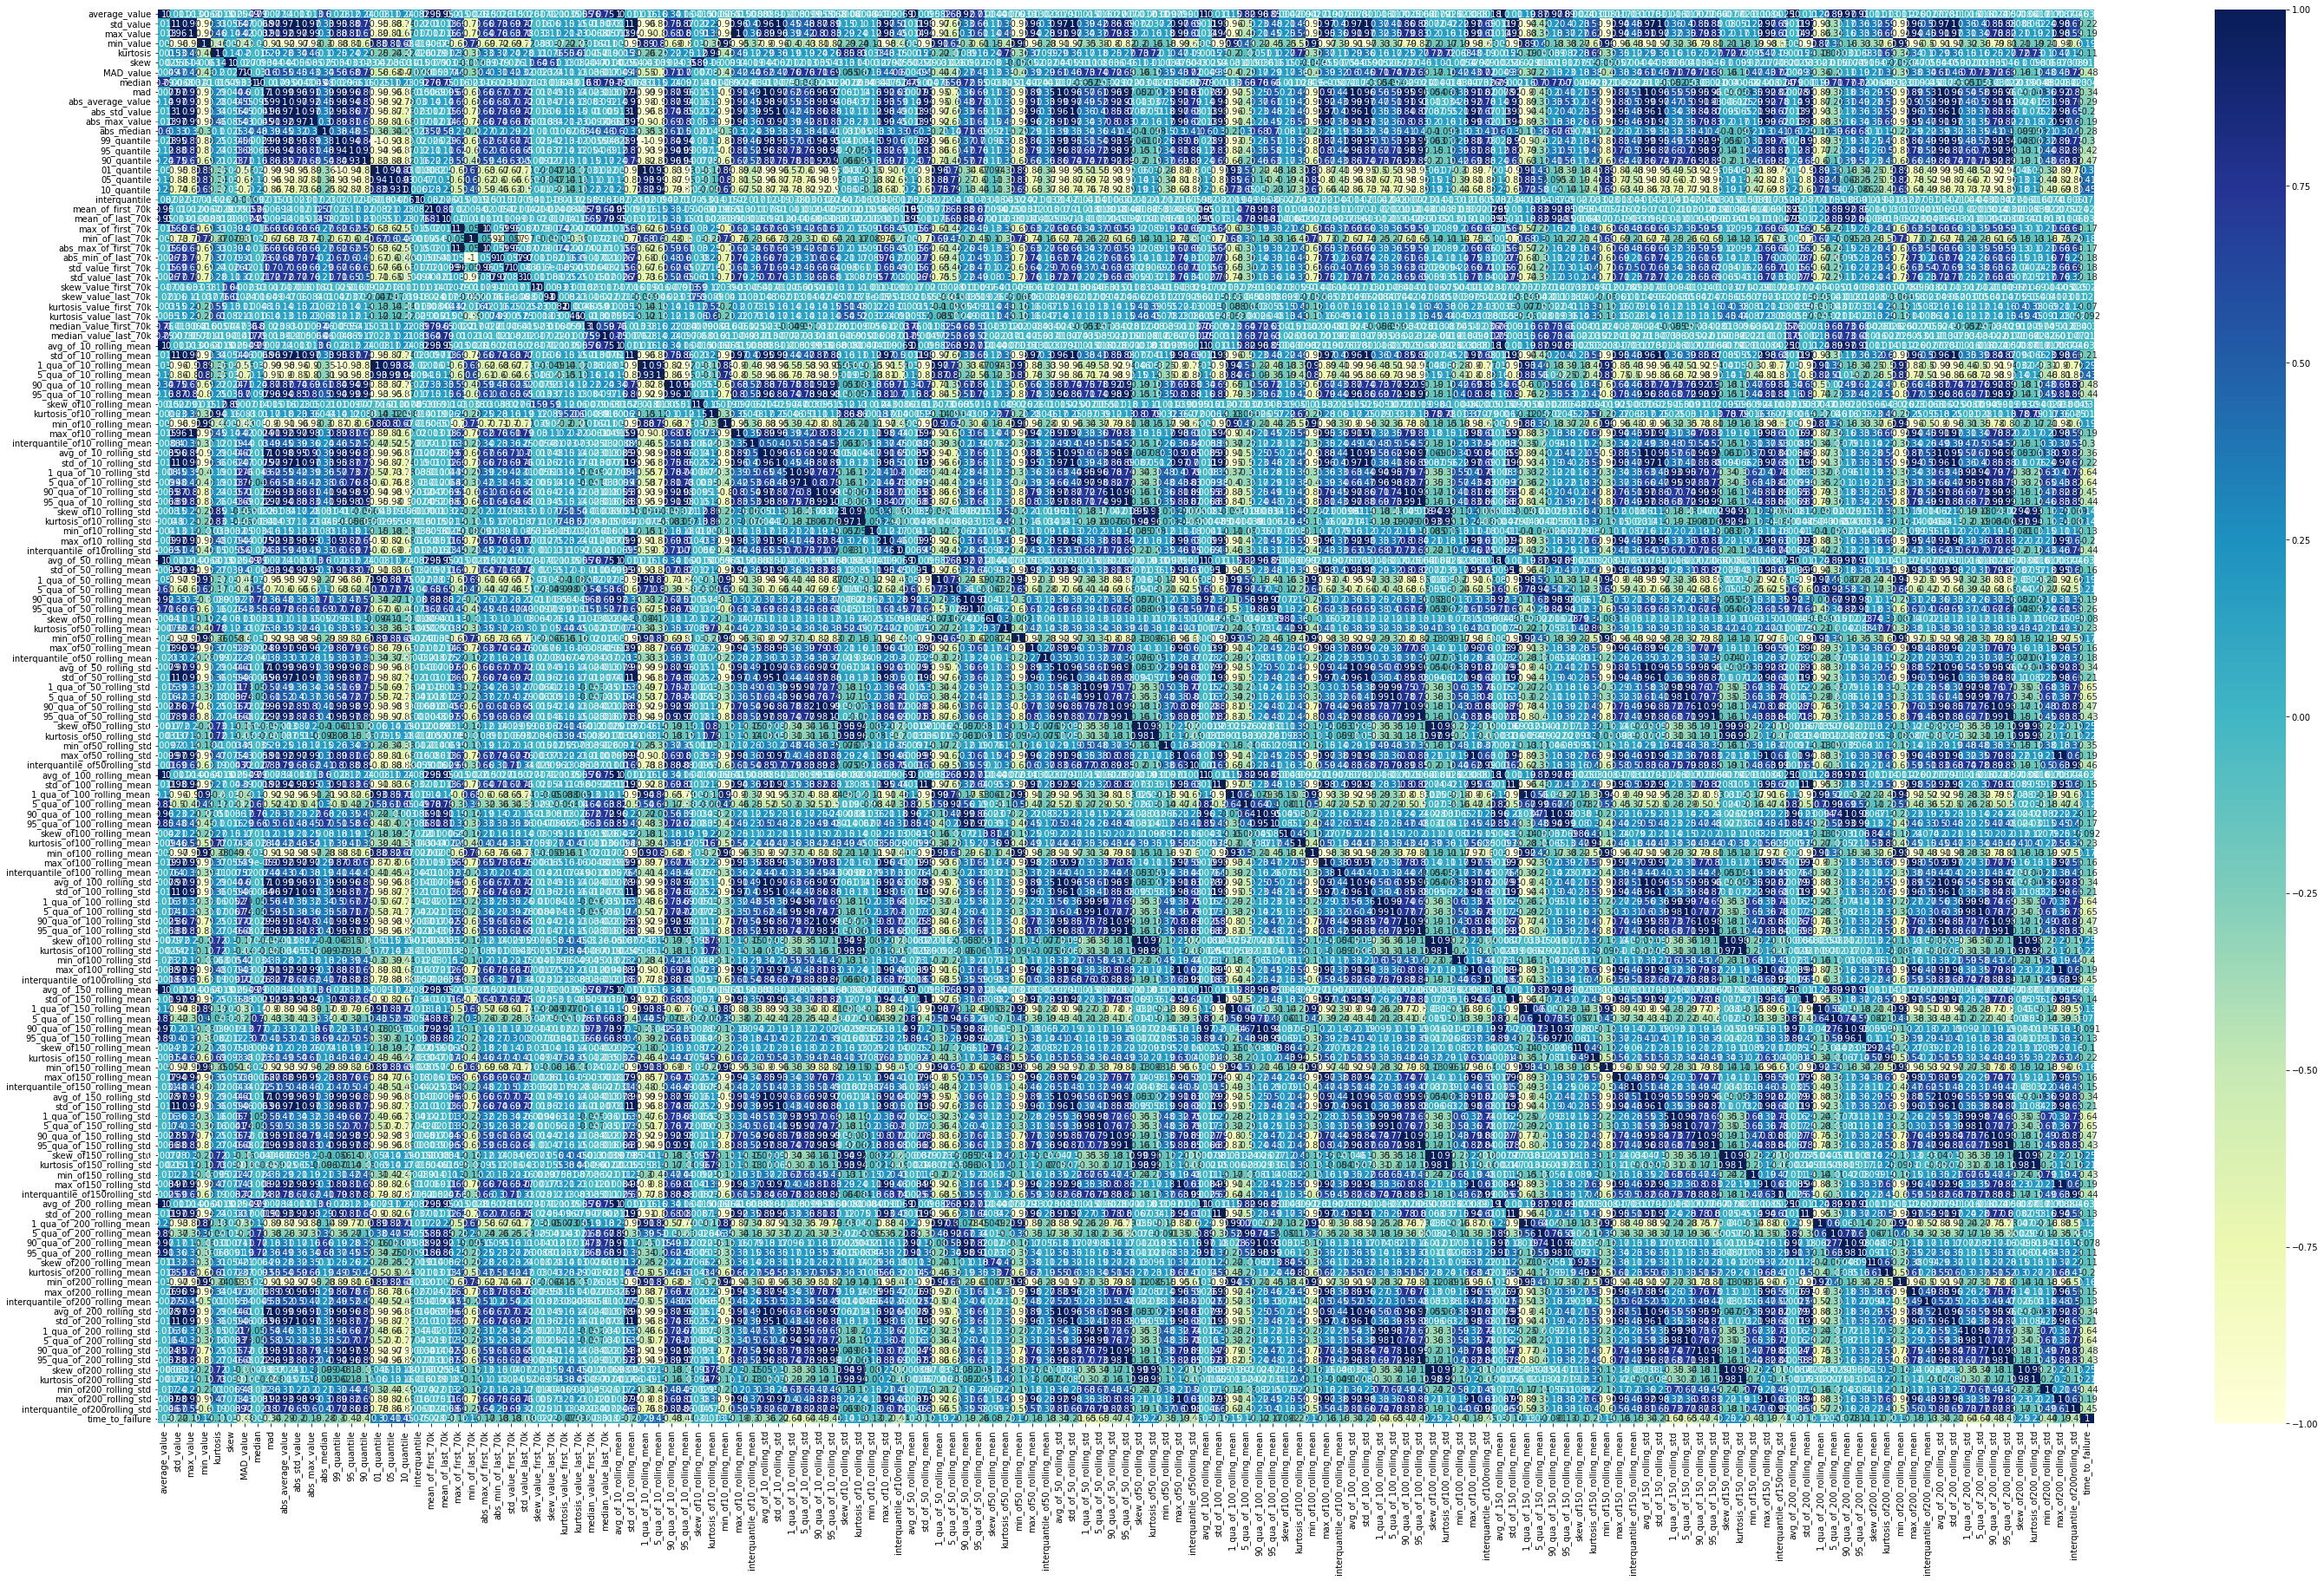

In [ ]:
plt.subplots(figsize=(50, 30))
dataplot = sns.heatmap(result.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
result.to_csv('final_with_new.csv' , index = False)

In [9]:
result = pd.read_csv('final_with_new.csv')
result.head()

average_value       std_value  max_value  min_value          kurtosis  \
0  4.884113333333  5.101089126891        104        -98   33.662481293451   
1  4.725766666667  6.588801819164        181       -154   98.758517178737   
2  4.906393333333  6.967373808829        140       -106   33.555211406929   
3  4.902240000000  6.922282112791        197       -199  116.548171687628   
4  4.908720000000  7.301085852684        145       -126   52.977904834406   

             skew       MAD_value  median             mad  abs_average_value  \
0 -0.024061166628  2.965204437011     5.0  3.263401356801     5.576566666667   
1  0.390560504372  2.965204437011     5.0  3.574301851112     5.734166666667   
2  0.217390561446  4.447806655517     5.0  3.948411362133     6.152646666667   
3  0.757277536411  2.965204437011     5.0  3.647117068799     5.933960000000   
4  0.064531069271  2.965204437011     5.0  3.826051623466     6.110586666667   

   ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0  ...            2.431984321227            2.564622083692   
1  ...            2.442586980185            2.555116062030   
2  ...            2.503384643511            2.621208196947   
3  ...            2.465024947061            2.578296543327   
4  ...            2.418085126374            2.577443710423   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0             6.412945449912             8.426044288261   
1             6.913956099420            10.101158686996   
2             8.575490961117            14.000372033689   
3             7.169505494674            10.100034390453   
4             7.459614382370            12.486139193292   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0          6.461305251475             61.806898410373         2.207137804133   
1          7.471568498262             74.159620841041         2.247941548622   
2          4.283417428151             22.545218960501         2.291074005898   
3          8.399211151281            101.184886676547         2.211158317608   
4          5.314309717666             34.310555381809         2.159884372486   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0        48.774154948649                  0.022808395568     1.4307971859  
1        73.800975739488                  0.024631982978     1.3914988931  
2        46.736445916270                  0.027551472908     1.3531960947  
3        93.348781863380                  0.022261428123     1.3137978019  
4        62.442689100571                  0.021512739064     1.2743995091  

[5 rows x 145 columns]

# 10.1 Image Feature With 200 Pixel

In [136]:
from scipy import signal
pixel_intensity = []
sample_value = 150000
for i in tqdm(range(4194)):
  x = df.iloc[i*sample_value :i*sample_value + sample_value]

  frequencies, times, spectrogram = signal.spectrogram(x.acoustic_data)
  pixel_intensity.append(spectrogram.flatten()[:200])

100%|██████████| 4194/4194 [01:00<00:00, 69.04it/s]


In [137]:
image_pixel_feature = []
#pixel_intensity = []
for i in range(200):
    image_pixel_feature.append('PI' + str(i))
    #pixel_intensity.append(spectrogram.flatten()[:500])

img_df = pd.DataFrame(pixel_intensity , columns = image_pixel_feature)

In [138]:
img_df.head()

PI0             PI1             PI2             PI3  \
0  0.237496783591  0.206341830532  0.316963138114  0.802695347872   
1  0.263611102679  0.029540420554  0.188121613420  0.009454775533   
2  5.924291386751  0.158864038068  1.824142854684  0.059718676450   
3  0.002804307081  0.024381310151  0.834677107898  1.051100176152   
4  0.414149277423  0.035607997886  2.693832984206  0.028724506648   

               PI4              PI5              PI6              PI7  \
0   0.021813379204   1.728457205248  26.881178433008  18.806085299206   
1   0.184859423450   0.017694018433   1.898907344197   0.164767624946   
2   0.122156685038   0.536493056709   8.072795595520   2.323794221268   
3   0.007693909756   1.221588505108   0.778420071522   1.806977347299   
4  12.456280188404  13.497332786248   0.587193160282  23.230865937527   

               PI8             PI9  ...           PI190            PI191  \
0   0.027118199383  7.525244719912  ...  1.884437766228   1.609977831451   
1   0.027639103586  0.524800563856  ...  3.679845970926   0.004535941712   
2   6.089645453655  0.125674595314  ...  0.110841372789  13.125504527821   
3   0.413938967858  0.027829785936  ...  7.285662831018   1.401019438577   
4  10.546467132093  0.810509444961  ...  0.872212278209  22.909873204472   

             PI192           PI193            PI194           PI195  \
0   6.969556560054  2.031779838320  18.022967037098  1.599638104375   
1  12.761645643340  0.549927395054   0.042458849100  0.826652522900   
2   1.042729021677  1.520929476573   1.435889139123  0.959695038575   
3   8.042279384264  0.000532006926   0.760646097557  0.009824830319   
4   2.770085227552  6.976369320208   0.054556151022  0.069977600782   

            PI196           PI197           PI198            PI199  
0  1.193680999736  1.212092232468  7.283238956174   2.880565258637  
1  0.040668050187  0.155863301426  0.088959610793  15.797288827094  
2  0.143984298471  0.001021002206  0.213484242302   0.854873407136  
3  0.002758732988  2.647521746357  1.204548802127   2.651412088346  
4  0.511168942151  2.608618644390  4.023276140058   4.931667059412  

[5 rows x 200 columns]

In [ ]:
#df_f = pd.read_csv('final.csv')
#df_f.head()

### concatenate both data frame

In [143]:
new = pd.concat([img_df, result], axis=1, join="inner")
new.head(3)

PI0             PI1             PI2             PI3  \
0  0.237496783591  0.206341830532  0.316963138114  0.802695347872   
1  0.263611102679  0.029540420554  0.188121613420  0.009454775533   
2  5.924291386751  0.158864038068  1.824142854684  0.059718676450   

              PI4             PI5              PI6              PI7  \
0  0.021813379204  1.728457205248  26.881178433008  18.806085299206   
1  0.184859423450  0.017694018433   1.898907344197   0.164767624946   
2  0.122156685038  0.536493056709   8.072795595520   2.323794221268   

              PI8             PI9  ...  1_qua_of_200_rolling_std  \
0  0.027118199383  7.525244719912  ...            2.431984321227   
1  0.027639103586  0.524800563856  ...            2.442586980185   
2  6.089645453655  0.125674595314  ...            2.503384643511   

   5_qua_of_200_rolling_std  90_qua_of_200_rolling_std  \
0            2.564622083692             6.412945449912   
1            2.555116062030             6.913956099420   
2            2.621208196947             8.575490961117   

   95_qua_of_200_rolling_std  skew_of200_rolling_std  \
0             8.426044288261          6.461305251475   
1            10.101158686996          7.471568498262   
2            14.000372033689          4.283417428151   

   kurtosis_of200_rolling_std  min_of200_rolling_std  max_of200_rolling_std  \
0             61.806898410373         2.207137804133        48.774154948649   
1             74.159620841041         2.247941548622        73.800975739488   
2             22.545218960501         2.291074005898        46.736445916270   

   interquantile_of200rolling_std  time_to_failure  
0                  0.022808395568     1.4307971859  
1                  0.024631982978     1.3914988931  
2                  0.027551472908     1.3531960947  

[3 rows x 345 columns]

### apply the basic algorithm

In [145]:
train = new
y = train.time_to_failure
x = train.drop('time_to_failure' , axis = 1)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.22,random_state=42)

In [147]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
x_train = autoscaler.fit_transform(x_train)

In [148]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
x_test = autoscaler.fit_transform(x_test)

In [149]:
print(x_train.shape)
print(x_test.shape)

(3271, 344)
(923, 344)


# 10.1.1 KNN

In [150]:
classification  = KNeighborsRegressor()
a = {'n_neighbors':[3,5,7,9,11,15,17,19]}
clf = RandomizedSearchCV(classification, a, cv= 5, scoring='neg_mean_absolute_error',return_train_score=True)
clf.fit(x_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [151]:
print(clf.best_params_)

{'n_neighbors': 19}


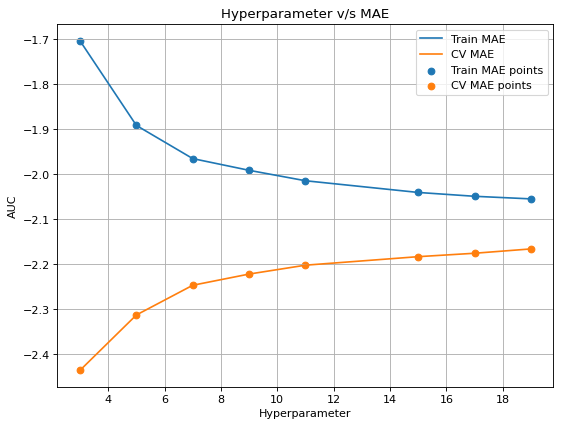

In [152]:
#train_auc = -1*train_auc
#cv_auc    = -1*cv_auc
figure(figsize=(8, 6), dpi=80)
plt.plot(a['n_neighbors'] , train_auc, label='Train MAE')
plt.plot(a['n_neighbors'] , cv_auc, label='CV MAE')
plt.scatter(a['n_neighbors'], train_auc, label='Train MAE points')
plt.scatter(a['n_neighbors'], cv_auc, label='CV MAE points')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter v/s MAE")
plt.grid()

In [153]:
clf = KNeighborsRegressor(n_neighbors = 19)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=19)

In [154]:
y_pre_train = clf.predict(x_train)
y_pre_test = clf.predict(x_test)

In [155]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test))

The mean absolute error on train data ==> 2.0607839018989833
The mean absolute error on test  data ==> 2.167671677570225


In [156]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test))

The mean absolute percentage error on train data ==> 4.089688644288316
The mean absolute percentage error on test  data ==> 4.082548544239063


# 10.1.2 Logistic Regression

In [157]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train , y_train)

LinearRegression()

In [158]:
train_pre = lr_clf.predict(x_train)
test_pre  = lr_clf.predict(x_test)

In [159]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.9577254433429785
The mean absolute error on test  data ==> 8.921819987061188


In [160]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 4.000865395697535
The mean absolute percentage error on test  data ==> 6.175328588073122


# 10.1.3 XGBoost

In [161]:
import lightgbm as lgb
#Checking for various parameters
clf2 = lgb.LGBMRegressor(n_jobs=-1) 
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50]} 
clf2 = RandomizedSearchCV(clf2, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf2.fit(x_train, y_train)
print(clf2.best_params_)

{'n_estimators': 500, 'max_depth': 5}


In [162]:
clf_2 = lgb.LGBMRegressor(max_depth = 20 ,n_estimators = 50)
clf_2.fit(x_train , y_train)

LGBMRegressor(max_depth=20, n_estimators=50)

In [163]:
train_pre = clf_2.predict(x_train)
test_pre  = clf_2.predict(x_test)

In [164]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.146877246708444
The mean absolute error on test  data ==> 2.275079098237828


In [165]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 1.9574660869514593
The mean absolute percentage error on test  data ==> 4.510849176039191


# 10.1.4 Random Forest 

In [166]:
from sklearn.ensemble import RandomForestRegressor
classification  = RandomForestRegressor(n_jobs = -1)
params = {'max_depth': [5,10,20,100,50] , 'n_estimators': [10,50,200,500,1000]} 
clf3 = RandomizedSearchCV(classification, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf3.fit(x_train, y_train)
print(clf3.best_params_)

{'n_estimators': 500, 'max_depth': 10}


In [167]:
clf_3 = RandomForestRegressor(max_depth = 5,n_estimators = 1000)
clf_3.fit(x_train , y_train) 

RandomForestRegressor(max_depth=5, n_estimators=1000)

In [168]:
train_pre = clf_3.predict(x_train)
test_pre  = clf_3.predict(x_test)

In [169]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.8656135365779485
The mean absolute error on test  data ==> 2.293266070076692


In [170]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 3.570990636855836
The mean absolute percentage error on test  data ==> 3.65252844871829


# 10.1.5 RF + XGB

In [171]:
xgb_train = clf_2.predict(x_train)
rf_train  = train_pre = clf_3.predict(x_train)

In [172]:
train_pre_both = (xgb_train + rf_train) / 2

In [173]:
xgb_test = clf_2.predict(x_test)
rf_test  = train_pre = clf_3.predict(x_test)

In [174]:
test_pre_both = (xgb_test + rf_test) / 2

In [175]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre_both))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre_both))

The mean absolute error on train data ==> 1.4954845930304739
The mean absolute error on test  data ==> 2.2378851225683456


In [176]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre_both))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre_both))

The mean absolute percentage error on train data ==> 2.7622540458130707
The mean absolute percentage error on test  data ==> 4.075077050711345


In [6]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["KNN", "2.060", "2.167", "4.08 %" , '4.08 %'])
myTable.add_row(["Linear Regression", "1.951", "8.921", "4.00 %" , '6.17 %'])
myTable.add_row(["Xgboost", "1.146", "2.270", "1.95 %" , '4.51 %'])
myTable.add_row(["Random Forest", "1.860", "2.293", "3.17 %" , '3.65 %'])
myTable.add_row(["Xgboost + RF", "1.490", "2.230", "2.76 %" , '4.07 %'])


print(myTable)

+-------------------+--------------+-------------+---------------+--------------+
|     Model Name    | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------+--------------+-------------+---------------+--------------+
|        KNN        |    2.060     |    2.167    |     4.08 %    |    4.08 %    |
| Linear Regression |    1.951     |    8.921    |     4.00 %    |    6.17 %    |
|      Xgboost      |    1.146     |    2.270    |     1.95 %    |    4.51 %    |
|   Random Forest   |    1.860     |    2.293    |     3.17 %    |    3.65 %    |
|    Xgboost + RF   |    1.490     |    2.230    |     2.76 %    |    4.07 %    |
+-------------------+--------------+-------------+---------------+--------------+


### Here best model is xgboost

# 11 Frequencies as feature 

In [24]:
from scipy import signal
#pixel_intensity = []
freqencie = []
sample_value = 150000
for i in tqdm(range(4194)):
  x = df.iloc[i*sample_value :i*sample_value + sample_value]

  frequencies, times, spectrogram = signal.spectrogram(x.acoustic_data)
  #powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x.acoustic_data, Fs=6)
  #pixel_intensity.append(spectrogram.flatten()[:200])
  freqencie.append(frequencies)

100%|██████████| 4194/4194 [00:15<00:00, 273.18it/s]


In [25]:
freqencie_feature = []
#pixel_intensity = []
for i in range(129):
    freqencie_feature.append('Fre' + str(i))
    #pixel_intensity.append(spectrogram.flatten()[:500])

img_df = pd.DataFrame(freqencie , columns = freqencie_feature)

In [26]:
img_df.head()

Fre0        Fre1       Fre2        Fre3      Fre4        Fre5       Fre6  \
0   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   
1   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   
2   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   
3   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   
4   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   

         Fre7     Fre8        Fre9  ...      Fre119   Fre120      Fre121  \
0  0.02734375  0.03125  0.03515625  ...  0.46484375  0.46875  0.47265625   
1  0.02734375  0.03125  0.03515625  ...  0.46484375  0.46875  0.47265625   
2  0.02734375  0.03125  0.03515625  ...  0.46484375  0.46875  0.47265625   
3  0.02734375  0.03125  0.03515625  ...  0.46484375  0.46875  0.47265625   
4  0.02734375  0.03125  0.03515625  ...  0.46484375  0.46875  0.47265625   

      Fre122      Fre123    Fre124      Fre125     Fre126      Fre127  Fre128  
0  0.4765625  0.48046875  0.484375  0.48828125  0.4921875  0.49609375     0.5  
1  0.4765625  0.48046875  0.484375  0.48828125  0.4921875  0.49609375     0.5  
2  0.4765625  0.48046875  0.484375  0.48828125  0.4921875  0.49609375     0.5  
3  0.4765625  0.48046875  0.484375  0.48828125  0.4921875  0.49609375     0.5  
4  0.4765625  0.48046875  0.484375  0.48828125  0.4921875  0.49609375     0.5  

[5 rows x 129 columns]

In [27]:
new = pd.concat([img_df, result], axis=1, join="inner")
new.head(3)

Fre0        Fre1       Fre2        Fre3      Fre4        Fre5       Fre6  \
0   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   
1   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   
2   0.0  0.00390625  0.0078125  0.01171875  0.015625  0.01953125  0.0234375   

         Fre7     Fre8        Fre9  ...  1_qua_of_200_rolling_std  \
0  0.02734375  0.03125  0.03515625  ...            2.431984321227   
1  0.02734375  0.03125  0.03515625  ...            2.442586980185   
2  0.02734375  0.03125  0.03515625  ...            2.503384643511   

   5_qua_of_200_rolling_std  90_qua_of_200_rolling_std  \
0            2.564622083692             6.412945449912   
1            2.555116062030             6.913956099420   
2            2.621208196947             8.575490961117   

   95_qua_of_200_rolling_std  skew_of200_rolling_std  \
0             8.426044288261          6.461305251475   
1            10.101158686996          7.471568498262   
2            14.000372033689          4.283417428151   

   kurtosis_of200_rolling_std  min_of200_rolling_std  max_of200_rolling_std  \
0             61.806898410373         2.207137804133        48.774154948649   
1             74.159620841041         2.247941548622        73.800975739488   
2             22.545218960501         2.291074005898        46.736445916270   

   interquantile_of200rolling_std  time_to_failure  
0                  0.022808395568     1.4307971859  
1                  0.024631982978     1.3914988931  
2                  0.027551472908     1.3531960947  

[3 rows x 274 columns]

### apply a basic algo

In [29]:
train = new
y = train.time_to_failure
x = train.drop('time_to_failure' , axis = 1)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.22,random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
x_train = autoscaler.fit_transform(x_train)

In [93]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
x_test = autoscaler.fit_transform(x_test)

In [94]:
print(x_train.shape)
print(x_test.shape)

(3271, 273)
(923, 273)


# 11.1 KNN

In [95]:
classification  = KNeighborsRegressor()
a = {'n_neighbors':[3,5,7,9,11,15,17,19]}
clf = RandomizedSearchCV(classification, a, cv= 5, scoring='neg_mean_absolute_error',return_train_score=True)
clf.fit(x_train, y_train)
train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score']
cv_auc_std= clf.cv_results_['std_test_score']

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


In [96]:
print(clf.best_params_)

{'n_neighbors': 19}


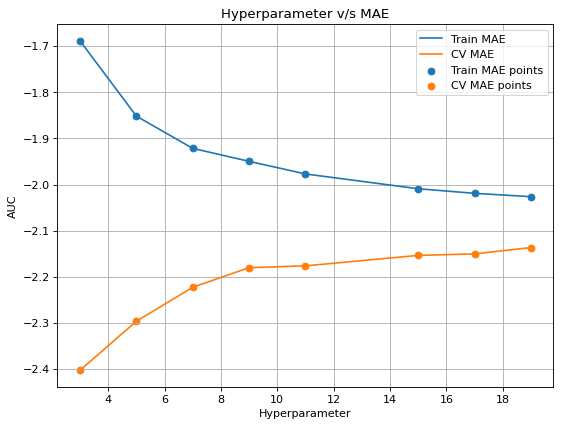

In [97]:
#train_auc = -1*train_auc
#cv_auc    = -1*cv_auc
figure(figsize=(8, 6), dpi=80)
plt.plot(a['n_neighbors'] , train_auc, label='Train MAE')
plt.plot(a['n_neighbors'] , cv_auc, label='CV MAE')
plt.scatter(a['n_neighbors'], train_auc, label='Train MAE points')
plt.scatter(a['n_neighbors'], cv_auc, label='CV MAE points')
plt.legend()
plt.xlabel("Hyperparameter")
plt.ylabel("AUC")
plt.title("Hyperparameter v/s MAE")
plt.grid()

In [98]:
clf = KNeighborsRegressor(n_neighbors = 19)
clf.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=19)

In [99]:
y_pre_train = clf.predict(x_train)
y_pre_test = clf.predict(x_test)

In [100]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test))

The mean absolute error on train data ==> 2.0236931228043264
The mean absolute error on test  data ==> 2.133332021897265


In [101]:

print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test))

The mean absolute percentage error on train data ==> 4.018817607668751
The mean absolute percentage error on test  data ==> 4.068089991684996


# 11.2 Linear Regression

In [102]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train , y_train)

LinearRegression()

In [103]:
train_pre = lr_clf.predict(x_train)
test_pre  = lr_clf.predict(x_test)

In [104]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 2.033269267787802
The mean absolute error on test  data ==> 2.2125296646213455


In [105]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 4.079569227919819
The mean absolute percentage error on test  data ==> 3.823297908025406


# 11.3 XGboost

In [113]:
import lightgbm as lgb
#Checking for various parameters
clf2 = lgb.LGBMRegressor(n_jobs=-1) 
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50]} 
clf2 = RandomizedSearchCV(clf2, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf2.fit(x_train, y_train)
print(clf2.best_params_)

{'n_estimators': 50, 'max_depth': 5}


In [114]:
clf_2 = lgb.LGBMRegressor(max_depth = 5 ,n_estimators = 50)
clf_2.fit(x_train , y_train)

LGBMRegressor(max_depth=5, n_estimators=50)

In [115]:
train_pre = clf_2.predict(x_train)
test_pre  = clf_2.predict(x_test)

In [116]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.6057123276787377
The mean absolute error on test  data ==> 2.1314240539148


In [117]:
from sklearn.metrics import mean_absolute_percentage_error
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 2.928554970017838
The mean absolute percentage error on test  data ==> 4.187270207599478


# 11.4 Random Forest

In [118]:
from sklearn.ensemble import RandomForestRegressor
classification  = RandomForestRegressor(n_jobs = -1)
params = { 'n_estimators': [10,50,200,500,1000], 'max_depth': [5,10,20,100,50] } 
clf3 = RandomizedSearchCV(classification, params, scoring='neg_mean_absolute_error', return_train_score= True) 
clf3.fit(x_train, y_train)
print(clf3.best_params_)

{'n_estimators': 1000, 'max_depth': 5}


In [119]:
clf_3 = RandomForestRegressor(max_depth = 5 ,n_estimators = 50 )
clf_3.fit(x_train , y_train) 

RandomForestRegressor(max_depth=5, n_estimators=50)

In [120]:
train_pre = clf_3.predict(x_train)
test_pre  = clf_3.predict(x_test)

In [121]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre))

The mean absolute error on train data ==> 1.888423602987566
The mean absolute error on test  data ==> 2.1050706128896453


In [122]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre))

The mean absolute percentage error on train data ==> 3.517232512593122
The mean absolute percentage error on test  data ==> 4.077030167073369


# 11.5 Use both model xgboost and random forest

In [123]:
xgb_train = clf_2.predict(x_train)
rf_train  = train_pre = clf_3.predict(x_train)

In [124]:
train_pre_both = (xgb_train + rf_train) / 2

In [125]:
xgb_test = clf_2.predict(x_test)
rf_test  = train_pre = clf_3.predict(x_test)

In [126]:
test_pre_both = (xgb_test + rf_test) / 2

In [127]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, train_pre_both))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, test_pre_both))

The mean absolute error on train data ==> 1.7377085690814065
The mean absolute error on test  data ==> 2.1101892617929314


In [128]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, train_pre_both))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, test_pre_both))

The mean absolute percentage error on train data ==> 3.221168033222509
The mean absolute percentage error on test  data ==> 4.130758849032759


In [9]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model Name", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["KNN", "2.033", "2.133", "4.01 %" , '4.06 %'])
myTable.add_row(["Linear Regression", "2.022", "2.212", "4.07 %" , '3.82 %'])
myTable.add_row(["Xgboost", "1.605", "2.131", "2.92 %" , '4.18 %'])
myTable.add_row(["Random Forest", "1.888", "2.105", "3.51 %" , '4.07 %'])
myTable.add_row(["Xgboost + RF", "1.737", "2.110", "3.22 %" , '4.13 %'])


print(myTable)

+-------------------+--------------+-------------+---------------+--------------+
|     Model Name    | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------+--------------+-------------+---------------+--------------+
|        KNN        |    2.033     |    2.133    |     4.01 %    |    4.06 %    |
| Linear Regression |    2.022     |    2.212    |     4.07 %    |    3.82 %    |
|      Xgboost      |    1.605     |    2.131    |     2.92 %    |    4.18 %    |
|   Random Forest   |    1.888     |    2.105    |     3.51 %    |    4.07 %    |
|    Xgboost + RF   |    1.737     |    2.110    |     3.22 %    |    4.13 %    |
+-------------------+--------------+-------------+---------------+--------------+


### best model is xgb

# Conclusion

In [11]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Feature Technique", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["Simple stat feature", "1.76", "2.09", "3.19 %" , '4.11 %'])
myTable.add_row(["500 pixel + simple stat", "1.09", "2.06", "1.86 %" , '3.72 %'])
myTable.add_row(["200 pixel + more stat feature", "1.14", "2.27", "1.95 %" , '4.51 %'])
myTable.add_row([" Frequenc + more stat feature", "1.60", "2.31", "2.92 %" , '4.18 %'])



print(myTable)

+-------------------------------+--------------+-------------+---------------+--------------+
|       Feature Technique       | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------------------+--------------+-------------+---------------+--------------+
|      Simple stat feature      |     1.76     |     2.09    |     3.19 %    |    4.11 %    |
|    500 pixel + simple stat    |     1.09     |     2.06    |     1.86 %    |    3.72 %    |
| 200 pixel + more stat feature |     1.14     |     2.27    |     1.95 %    |    4.51 %    |
|  Frequenc + more stat feature |     1.60     |     2.31    |     2.92 %    |    4.18 %    |
+-------------------------------+--------------+-------------+---------------+--------------+


Here we take all the best models MAE and MAPE, from all this observation we can say the basic statistical feature with the image pixel feature is the very well preform, 

so next things, we go with the pixel feature with the basic statistical feature and we will build all regression models, then we take our submission data and we will predict the remaining time for the earthquake. 

# 12 Stacking Model

In the stacking model, we take three base models as KNN, RF, and LR, and in the Final model we use XGB, we have already done the hyperparameter tunning in the early section so we use these direct values.

### 12.1 simple statistical data

In [2]:
import pandas as pd
train = pd.read_csv('simple_stat_1.csv')
train.head(2)

average_value  std_value  max_value  min_value   kurtosis      skew  \
0       4.884113   5.101089        104        -98  33.662481 -0.024061   
1       4.725767   6.588802        181       -154  98.758517  0.390561   

   MAD_value  median       mad  abs_average_value  ...  \
0   2.965204     5.0  3.263401           5.576567  ...   
1   2.965204     5.0  3.574302           5.734167  ...   

   1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0                  2.431984                  2.564622   
1                  2.442587                  2.555116   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0                   6.412945                   8.426044   
1                   6.913956                  10.101159   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0                6.461305                   61.806898               2.207138   
1                7.471568                   74.159621               2.247942   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0              48.774155                        0.022808         1.430797  
1              73.800976                        0.024632         1.391499  

[2 rows x 133 columns]

In [ ]:
y = train.time_to_failure
x = train.drop('time_to_failure' , axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(3355, 132)
(839, 132)


In [ ]:
#from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import StackingRegressor
xgb = lgb.LGBMRegressor(n_estimators = 50 , max_depth = 5 , n_jobs=-1)

#regressors = [lr, rf, knn, svr]
regressors = [('lr' , LinearRegression()) ,('rf' , RandomForestRegressor(max_depth = 5, n_estimators = 500, random_state=1)) ,('knn' , KNeighborsRegressor(n_neighbors = 11))]
stregr = StackingRegressor(estimators=regressors, final_estimator=xgb)

stregr.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=5,
                                                     n_estimators=500,
                                                     random_state=1)),
                              ('knn', KNeighborsRegressor(n_neighbors=11))],
                  final_estimator=LGBMRegressor(max_depth=5, n_estimators=50))

In [ ]:
y_pre_train = stregr.predict(x_train)
y_pre_test = stregr.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test))

The mean absolute error on train data ==> 1.9663070244812442
The mean absolute error on test  data ==> 2.1134091372343944


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test))

The mean absolute percentage error on train data ==> 4.066394111445919
The mean absolute percentage error on test  data ==> 3.961649967420819


## 12.2 simple statistical data + 500 pixel

In [ ]:
train_2 = pd.read_csv('simple_stat_500_pixel.csv')
train_2.head(2)

PI0       PI1       PI2       PI3       PI4       PI5        PI6  \
0  0.237497  0.206342  0.316963  0.802695  0.021813  1.728457  26.881178   
1  0.263611  0.029540  0.188122  0.009455  0.184859  0.017694   1.898907   

         PI7       PI8       PI9  ...  1_qua_of_200_rolling_std  \
0  18.806085  0.027118  7.525245  ...                  2.431984   
1   0.164768  0.027639  0.524801  ...                  2.442587   

   5_qua_of_200_rolling_std  90_qua_of_200_rolling_std  \
0                  2.564622                   6.412945   
1                  2.555116                   6.913956   

   95_qua_of_200_rolling_std  skew_of200_rolling_std  \
0                   8.426044                6.461305   
1                  10.101159                7.471568   

   kurtosis_of200_rolling_std  min_of200_rolling_std  max_of200_rolling_std  \
0                   61.806898               2.207138              48.774155   
1                   74.159621               2.247942              73.800976   

   interquantile_of200rolling_std  time_to_failure  
0                        0.022808         1.430797  
1                        0.024632         1.391499  

[2 rows x 633 columns]

In [ ]:
y = train_2.time_to_failure
x = train_2.drop('time_to_failure' , axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
#from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import StackingRegressor
xgb = lgb.LGBMRegressor(n_estimators = 50 , max_depth = 50 , n_jobs=-1)

#regressors = [lr, rf, knn, svr]
regressors = [('lr' , LinearRegression()) ,('rf' , RandomForestRegressor(max_depth = 10, n_estimators = 1000, random_state=1)) ,('knn' , KNeighborsRegressor(n_neighbors = 15))]
stregr = StackingRegressor(estimators=regressors, final_estimator=xgb)

stregr.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=1000,
                                                     random_state=1)),
                              ('knn', KNeighborsRegressor(n_neighbors=15))],
                  final_estimator=LGBMRegressor(max_depth=50, n_estimators=50))

In [ ]:
y_pre_train_2 = stregr.predict(x_train)
y_pre_test_2 = stregr.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train_2))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test_2))

The mean absolute error on train data ==> 1.4376811432911247
The mean absolute error on test  data ==> 2.122153905732314


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train_2))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test_2))

The mean absolute percentage error on train data ==> 2.0014846471352423
The mean absolute percentage error on test  data ==> 4.013002031890184


## 12.3 More statistical data + 200 pixel

In [ ]:
import pandas as pd
train_3 = pd.read_csv('more_stat_200_pixel.csv')
train_3.head(2)

PI0       PI1       PI2       PI3       PI4       PI5        PI6  \
0  0.237497  0.206342  0.316963  0.802695  0.021813  1.728457  26.881178   
1  0.263611  0.029540  0.188122  0.009455  0.184859  0.017694   1.898907   

         PI7       PI8       PI9  ...  1_qua_of_200_rolling_std  \
0  18.806085  0.027118  7.525245  ...                  2.431984   
1   0.164768  0.027639  0.524801  ...                  2.442587   

   5_qua_of_200_rolling_std  90_qua_of_200_rolling_std  \
0                  2.564622                   6.412945   
1                  2.555116                   6.913956   

   95_qua_of_200_rolling_std  skew_of200_rolling_std  \
0                   8.426044                6.461305   
1                  10.101159                7.471568   

   kurtosis_of200_rolling_std  min_of200_rolling_std  max_of200_rolling_std  \
0                   61.806898               2.207138              48.774155   
1                   74.159621               2.247942              73.800976   

   interquantile_of200rolling_std  time_to_failure  
0                        0.022808         1.430797  
1                        0.024632         1.391499  

[2 rows x 345 columns]

In [ ]:
y = train_3.time_to_failure
x = train_3.drop('time_to_failure' , axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
#from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import StackingRegressor
xgb = lgb.LGBMRegressor(n_estimators = 500 , max_depth = 5 , n_jobs=-1)

#regressors = [lr, rf, knn, svr]
regressors = [('lr' , LinearRegression()) ,('rf' , RandomForestRegressor(max_depth = 10, n_estimators = 500, random_state=1)) ,('knn' , KNeighborsRegressor(n_neighbors = 19))]
stregr_3 = StackingRegressor(estimators=regressors, final_estimator=xgb)

stregr_3.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                              ('knn', KNeighborsRegressor(n_neighbors=19))],
                  final_estimator=LGBMRegressor(max_depth=5, n_estimators=500))

In [ ]:
y_pre_train_3 = stregr_3.predict(x_train)
y_pre_test_3 = stregr_3.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train_3))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test_3))

The mean absolute error on train data ==> 1.752893011676718
The mean absolute error on test  data ==> 2.148418176648559


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train_3))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test_3))

The mean absolute percentage error on train data ==> 3.1269777200260784
The mean absolute percentage error on test  data ==> 3.8400883087046185


## 12.4 More statistical data + frequency

In [ ]:
import pandas as pd
train_4 = pd.read_csv('more_stat_with_freq.csv')
train_4.head()

Fre0      Fre1      Fre2      Fre3      Fre4      Fre5      Fre6      Fre7  \
0   0.0  0.003906  0.007812  0.011719  0.015625  0.019531  0.023438  0.027344   
1   0.0  0.003906  0.007812  0.011719  0.015625  0.019531  0.023438  0.027344   
2   0.0  0.003906  0.007812  0.011719  0.015625  0.019531  0.023438  0.027344   
3   0.0  0.003906  0.007812  0.011719  0.015625  0.019531  0.023438  0.027344   
4   0.0  0.003906  0.007812  0.011719  0.015625  0.019531  0.023438  0.027344   

      Fre8      Fre9  ...  1_qua_of_200_rolling_std  5_qua_of_200_rolling_std  \
0  0.03125  0.035156  ...                  2.431984                  2.564622   
1  0.03125  0.035156  ...                  2.442587                  2.555116   
2  0.03125  0.035156  ...                  2.503385                  2.621208   
3  0.03125  0.035156  ...                  2.465025                  2.578297   
4  0.03125  0.035156  ...                  2.418085                  2.577444   

   90_qua_of_200_rolling_std  95_qua_of_200_rolling_std  \
0                   6.412945                   8.426044   
1                   6.913956                  10.101159   
2                   8.575491                  14.000372   
3                   7.169505                  10.100034   
4                   7.459614                  12.486139   

   skew_of200_rolling_std  kurtosis_of200_rolling_std  min_of200_rolling_std  \
0                6.461305                   61.806898               2.207138   
1                7.471568                   74.159621               2.247942   
2                4.283417                   22.545219               2.291074   
3                8.399211                  101.184887               2.211158   
4                5.314310                   34.310555               2.159884   

   max_of200_rolling_std  interquantile_of200rolling_std  time_to_failure  
0              48.774155                        0.022808         1.430797  
1              73.800976                        0.024632         1.391499  
2              46.736446                        0.027551         1.353196  
3              93.348782                        0.022261         1.313798  
4              62.442689                        0.021513         1.274400  

[5 rows x 274 columns]

In [ ]:
y = train_4.time_to_failure
x = train_4.drop('time_to_failure' , axis = 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
x_train = autoscaler.fit_transform(x_train)

In [ ]:
from sklearn.preprocessing import StandardScaler
autoscaler = StandardScaler()
x_test = autoscaler.fit_transform(x_test)

In [ ]:
#from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import StackingRegressor
xgb = lgb.LGBMRegressor(n_estimators = 500 , max_depth = 5 , n_jobs=-1)

#regressors = [lr, rf, knn, svr]
regressors = [('lr' , LinearRegression()) ,('rf' , RandomForestRegressor(max_depth = 10, n_estimators = 500, random_state=1)) ,('knn' , KNeighborsRegressor(n_neighbors = 19))]
stregr_4 = StackingRegressor(estimators=regressors, final_estimator=xgb)

stregr_4.fit(x_train, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('rf',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=500,
                                                     random_state=1)),
                              ('knn', KNeighborsRegressor(n_neighbors=19))],
                  final_estimator=LGBMRegressor(max_depth=5, n_estimators=500))

In [ ]:
y_pre_train_4 = stregr_4.predict(x_train)
y_pre_test_4 = stregr_4.predict(x_test)

In [ ]:
print('The mean absolute error on train data ==>' ,mean_absolute_error(y_train, y_pre_train_4))
print('The mean absolute error on test  data ==>' ,mean_absolute_error(y_test, y_pre_test_4))

The mean absolute error on train data ==> 1.8820432336682145
The mean absolute error on test  data ==> 2.0984356978286476


In [ ]:
print('The mean absolute percentage error on train data ==>' ,mean_absolute_percentage_error(y_train, y_pre_train_4))
print('The mean absolute percentage error on test  data ==>' ,mean_absolute_percentage_error(y_test, y_pre_test_4))

The mean absolute percentage error on train data ==> 3.706813933322347
The mean absolute percentage error on test  data ==> 3.396934841237274


In [1]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
print('All Top Model Vs Stacking Model On all Four Data set')
myTable = PrettyTable(["Feature Technique", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["Simple stat feature", "1.76", "2.09", "3.19 %" , '4.11 %'])
myTable.add_row(["500 pixel + simple stat", "1.09", "2.06", "1.86 %" , '3.72 %'])
myTable.add_row(["200 pixel + more stat feature", "1.14", "2.27", "1.95 %" , '4.51 %'])
myTable.add_row([" Frequenc + more stat feature", "1.60", "2.31", "2.92 %" , '4.18 %'])



print(myTable)



print(50*'==')

print('Result of the stacking model on all of data set')


myTable = PrettyTable(["Feature Technique", "MAE on train", "MAE on test", "MAPE on train" , 'MAPE on test'])

# Add rows
myTable.add_row(["Simple stat feature", "1.966", "2.113", "4.06 %" , '3.96 %'])
myTable.add_row(["500 pixel + simple stat", "1.437", "2.122", "2.00 %" , '4.01 %'])
myTable.add_row(["200 pixel + more stat feature", "1.752", "2.148", "3.12 %" , '3.84 %'])
myTable.add_row([" Frequenc + more stat feature", "1.882", "2.098", "3.70 %" , '3.96 %'])
print(myTable)

All Top Model Vs Stacking Model On all Four Data set
+-------------------------------+--------------+-------------+---------------+--------------+
|       Feature Technique       | MAE on train | MAE on test | MAPE on train | MAPE on test |
+-------------------------------+--------------+-------------+---------------+--------------+
|      Simple stat feature      |     1.76     |     2.09    |     3.19 %    |    4.11 %    |
|    500 pixel + simple stat    |     1.09     |     2.06    |     1.86 %    |    3.72 %    |
| 200 pixel + more stat feature |     1.14     |     2.27    |     1.95 %    |    4.51 %    |
|  Frequenc + more stat feature |     1.60     |     2.31    |     2.92 %    |    4.18 %    |
+-------------------------------+--------------+-------------+---------------+--------------+
Result of the stacking model on all of data set
+-------------------------------+--------------+-------------+---------------+--------------+
|       Feature Technique       | MAE on train | MAE 

# Final Conclusion

**Here we have a total of 4 different datasets and on each dataset, we apply a total of 6 models, this model is as follows 1 KNN 2. LR, 3. RF 4. XGB, 5. RF + XGB and 6. Stacking model**

**From all these models and the dataset, we can say the XGB works very all on the simple Statistical feature + 500 pixels dataset with the MAE value is 1.09 and the MAPE 2.06 on the training dataset.**